# Cargamos datasets

In [161]:
import pandas as pd

# Cargar los datasets
movies_df = pd.read_csv("../data/movies_dataset.csv")
users_test_df = pd.read_csv("../data/users_test.csv")

# Informaci√≥n dataset movies

In [2]:

# Mostrar informaci√≥n general de los datasets
print("-- Dataset movies ---")
print("\n-- info ---")
print(movies_df.info())
print("\n-- head ---")
print(movies_df.head())
print("\n-- describe ---")
print(movies_df.describe(include="all"))

-- Dataset movies ---

-- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4900 non-null   object
 1   user             4900 non-null   object
 2   rating           4900 non-null   int64 
 3   theme            4900 non-null   object
 4   production_year  4900 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 191.5+ KB
None

-- head ---
           name     user  rating   theme  production_year
0  12 Angry Men  user169       6  Sci-Fi             2021
1  12 Angry Men  user425       9  Sci-Fi             2015
2  12 Angry Men  user321       8  Sci-Fi             2021
3  12 Angry Men  user329       4  Sci-Fi             2015
4  12 Angry Men  user303       1  Sci-Fi             2021

-- describe ---
              name     user       rating  theme  production_year
count         4900     4900  4900.000000   4

# Informaci√≥n dataset user_test

In [3]:
print("\n-- Dataset test users ---")
print("\n-- info ---")
print(users_test_df.info())
print("\n-- head ---")
print(users_test_df.head(100))
print("\n-- describe ---")
print(users_test_df.describe(include="all"))


-- Dataset test users ---

-- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  143 non-null    int64 
 1   user        143 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None

-- head ---
    Unnamed: 0     user
0            0  user169
1            1  user425
2            2  user321
3            3  user329
4            4  user303
..         ...      ...
95        4704  user115
96        4705  user119
97        4706  user138
98        4707  user170
99        4708  user161

[100 rows x 2 columns]

-- describe ---
         Unnamed: 0     user
count    143.000000      143
unique          NaN      143
top             NaN  user169
freq            NaN        1
mean    1701.342657      NaN
std     2261.690886      NaN
min        0.000000      NaN
25%       37.500000      NaN
50%       76.000000      NaN
75%     4

# Revisi√≥n nulos y duplicados.

## Movies

In [4]:
# Revisar valores nulos por columna
print("Valores nulos por columna:")
print(movies_df.isna().sum())

Valores nulos por columna:
name               0
user               0
rating             0
theme              0
production_year    0
dtype: int64


In [5]:
# Revisar filas potencialmente duplicadas
print("\nN√∫mero de filas duplicadas en movies_df:", movies_df.duplicated().sum())


N√∫mero de filas duplicadas en movies_df: 0


## Users_test

In [6]:
# Revisar valores nulos por columna
print("Valores nulos por columna:")
print(users_test_df.isna().sum())

Valores nulos por columna:
Unnamed: 0    0
user          0
dtype: int64


In [7]:
# Revisar filas potencialmente duplicadas
print("\nN√∫mero de filas duplicadas en movies_df:", users_test_df.duplicated().sum())


N√∫mero de filas duplicadas en movies_df: 0


In [8]:
users_test_df = users_test_df.drop("Unnamed: 0", axis=1)


In [9]:
print(users_test_df)

        user
0    user169
1    user425
2    user321
3    user329
4    user303
..       ...
138  user160
139   user55
140    user6
141   user85
142  user177

[143 rows x 1 columns]


In [10]:
# Opcional: mostrar duplicados (si existieran) para examinarlos
# if movies_df.duplicated().sum() > 0:
#     duplicates = movies_df[movies_df.duplicated(keep=False)]
#     print("\nEjemplos de filas duplicadas:")
#     print(duplicates.head(10))

# EDA

In [11]:
import matplotlib.pyplot as plt

# 1. Cantidad de usuarios y pel√≠culas √∫nicas
num_unique_users = movies_df['user'].nunique()
num_unique_movies = movies_df['name'].nunique()

print(f"N√∫mero de usuarios √∫nicos: {num_unique_users}")
print(f"N√∫mero de pel√≠culas √∫nicas: {num_unique_movies}")

N√∫mero de usuarios √∫nicos: 196
N√∫mero de pel√≠culas √∫nicas: 94


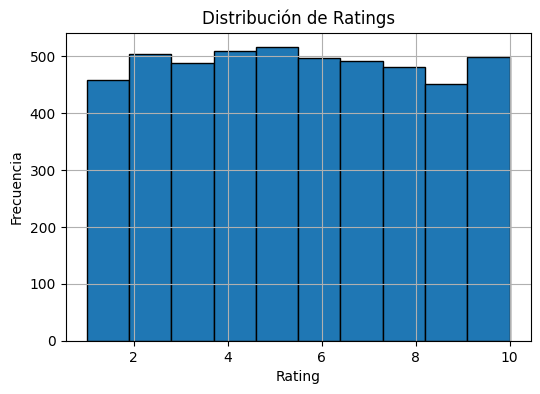

In [12]:
# 2. Distribuci√≥n de las valoraciones
plt.figure(figsize=(6,4))
movies_df['rating'].hist(bins=10, edgecolor='black')
plt.title("Distribuci√≥n de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

In [13]:
# 3. Cantidad de rese√±as por usuario
reviews_per_user = movies_df['user'].value_counts()
print("\nEstad√≠sticas de rese√±as por usuario:")
print(reviews_per_user.describe())



Estad√≠sticas de rese√±as por usuario:
count    196.000000
mean      25.000000
std       37.693773
min        1.000000
25%        1.000000
50%        3.500000
75%       88.000000
max      101.000000
Name: count, dtype: float64


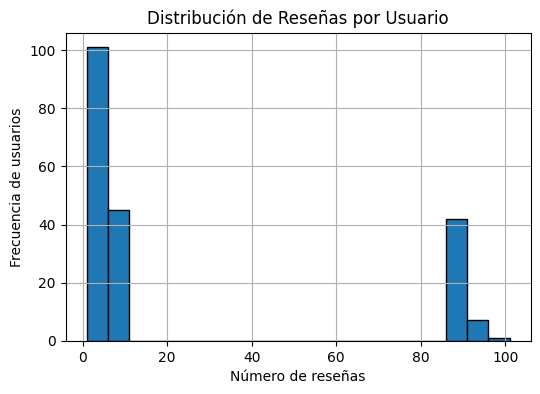

In [14]:
# Opcional: ver la distribuci√≥n de forma gr√°fica
plt.figure(figsize=(6,4))
reviews_per_user.hist(bins=20, edgecolor='black')
plt.title("Distribuci√≥n de Rese√±as por Usuario")
plt.xlabel("N√∫mero de rese√±as")
plt.ylabel("Frecuencia de usuarios")
plt.show()

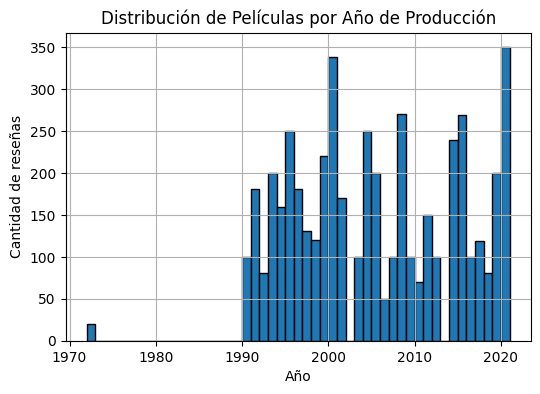

In [15]:
# 4. Distribuci√≥n de las pel√≠culas por a√±o
plt.figure(figsize=(6,4))
movies_df['production_year'].hist(bins=range(movies_df['production_year'].min(), 
                                             movies_df['production_year'].max()+1),
                                  edgecolor='black')
plt.title("Distribuci√≥n de Pel√≠culas por A√±o de Producci√≥n")
plt.xlabel("A√±o")
plt.ylabel("Cantidad de rese√±as")
plt.show()

In [16]:
# Vamos a ver si todos los usuarios en users_test_df est√°n en movies_df
unique_users_training = set(movies_df['user'].unique())
users_test = set(users_test_df['user'].unique())

# Usuarios del test que s√≠ est√°n en el training
users_in_training = users_test.intersection(unique_users_training)
# Usuarios del test que no est√°n en el training
users_not_in_training = users_test.difference(unique_users_training)

print(f"Usuarios en test: {len(users_test)}")
print(f"Usuarios del test que tambi√©n est√°n en training: {len(users_in_training)}")
print(f"Usuarios del test que no est√°n en training: {len(users_not_in_training)}")
print("\nEjemplo de usuarios que NO est√°n en training:", list(users_not_in_training)[:10])


Usuarios en test: 143
Usuarios del test que tambi√©n est√°n en training: 143
Usuarios del test que no est√°n en training: 0

Ejemplo de usuarios que NO est√°n en training: []


## Observaciones

1. **Distribuci√≥n de ratings**:  
   Observamos un reparto bastante uniforme de 1 a 10. No parece haber sesgos fuertes (por ejemplo, todo el mundo valorando muy alto), lo cual es bueno para el modelo.  

2. **Rese√±as por usuario**:  
   - Tenemos 196 usuarios, con una media de 25 rese√±as cada uno, pero la mediana es de apenas 3.5 rese√±as.  
   - Esto revela que hay usuarios muy activos (el 25% superior llega a 88 rese√±as o m√°s) y muchos usuarios con muy pocas rese√±as (la mitad de los usuarios tiene 3-4 rese√±as o menos).  
   - Esta disparidad puede complicar un poco el filtrado colaborativo **basado en usuarios** puro, ya que para muchos usuarios hay muy poca informaci√≥n.  

3. **Pel√≠culas por a√±o**:  
   - El rango va aproximadamente desde 1972 hasta 2021, con una mayor concentraci√≥n a partir de los 90 y 2000. No se aprecian problemas de datos faltantes.  

4. **Usuarios de test presentes en el set de entrenamiento**:  
   - ¬°Los 143 usuarios de test aparecen tambi√©n en el set de entrenamiento! No tenemos problema de *cold start* de usuario; todos tienen al menos alguna rese√±a en el set de entrenamiento.


## Reflexi√≥n

Con lo anterior, tenemos un escenario favorable:  
- No tenemos usuarios completamente nuevos.  
- No tenemos valores nulos.  
- Hay cierta variabilidad en el n√∫mero de rese√±as por usuario.  

Dado que todos los usuarios de test s√≠ tienen historial, podr√≠amos aplicar un **sistema de recomendaci√≥n colaborativo** (ya sea **User-Based** o **Item-Based**). No obstante, conviene se√±alar:

- **User-Based CF** puede sufrir cuando un usuario tiene muy pocas rese√±as (lo que dificulta encontrar vecinos ‚Äúsimilares‚Äù).  
- **Item-Based CF** tiende a ser m√°s estable cuando las pel√≠culas tienen suficiente cantidad de rese√±as de distintos usuarios. Como tenemos 94 pel√≠culas y cada una ha sido valorada m√∫ltiples veces, es probable que **Item-Based** funcione razonablemente bien.  

Otra opci√≥n es usar un **enfoque h√≠brido** que combine filtrado colaborativo y basado en contenido (usando `theme` y `production_year`). Sin embargo, quiz√° lo m√°s directo sea empezar con un enfoque colaborativo sencillo y luego ver si necesitamos ‚Äúrefinar‚Äù con informaci√≥n de contenido para mejorar resultados.

# Matriz usuario-item

- La matriz usuario‚Äìitem que contenga las valoraciones, pues es un paso habitual en recomendaci√≥n colaborativa
- Luego podremos decidir si hacemos un Item-Based CF o un modelo de factorizaci√≥n matricial (SVD)

In [17]:
import numpy as np

# Construimos la matriz usuario-item.
# Filas = usuarios, 
# columnas = pel√≠culas.
# El valor en [fila, columna] es el rating del usuario a la pel√≠cula.

# 1) Obtener listas √∫nicas y ordenadas de usuarios y pel√≠culas
unique_users = sorted(movies_df['user'].unique())
unique_movies = sorted(movies_df['name'].unique())

# 2) Creamos diccionarios para mapear user -> √≠ndice y movie -> √≠ndice
user_to_idx = {user: idx for idx, user in enumerate(unique_users)}
movie_to_idx = {movie: idx for idx, movie in enumerate(unique_movies)}

# 3) Inicializamos la matriz con ceros o con np.nan
user_item_matrix = np.zeros((len(unique_users), len(unique_movies)))

# 4) Rellenamos la matriz con los ratings
for row in movies_df.itertuples(index=False):
    u = row.user
    m = row.name
    r = row.rating
    user_index = user_to_idx[u]
    movie_index = movie_to_idx[m]
    user_item_matrix[user_index, movie_index] = r

print(f"Dimensiones de la matriz usuario-item: {user_item_matrix.shape}")
print("¬∑ Fila = Usuarios")
print("¬∑ Columna = Pel√≠culas")
print("\nEjemplo de la matriz (primeras 10 filas y 10 columnas):")
print(user_item_matrix[:10,:10])


Dimensiones de la matriz usuario-item: (196, 94)
¬∑ Fila = Usuarios
¬∑ Columna = Pel√≠culas

Ejemplo de la matriz (primeras 10 filas y 10 columnas):
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  6.  6.  4.  9.  1.  4. 10.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


¬øQu√© haremos con los ceros?

- A veces se dejan como 0 y se interpreta que el usuario no valor√≥ esa pel√≠cula.
- Otras veces se prefiere usar NaN (valores faltantes) y aplicar un algoritmo que maneje bien los missing values.
- Tambi√©n se puede sustituir por la media del usuario o de la pel√≠cula para normalizar un poco.

# Usaremos un Item-Based Collaborative Filtering simple
- Que suele funcionar bien cuando hay m√°s usuarios que √≠tems y cada pel√≠cula tiene suficientes valoraciones.

## Idea general de Item-Based CF


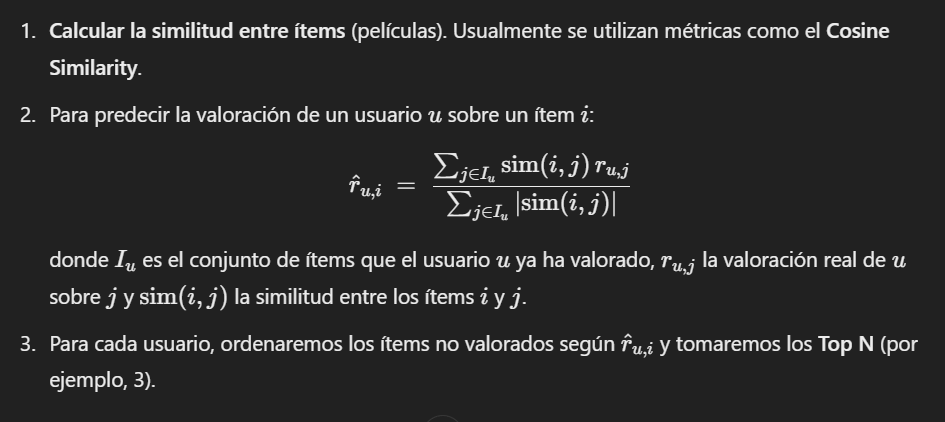
   

## C√≥digo

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1) Calculamos la similitud entre pel√≠culas (√≠tems)
#    Tomamos la matriz de items transpuesta, es decir user_item_matrix.T 
#    Dimensi√≥n: (n_items, n_users)
item_similarity = cosine_similarity(user_item_matrix.T)  
# item_similarity[i, j] = similitud entre la pel√≠cula i y j

# 2) Definimos una funci√≥n para predecir el rating de un usuario u para un √≠tem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicci√≥n de la valoraci√≥n del usuario user_index para la pel√≠cula item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los √≠tems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la pel√≠cula i con todas las dem√°s
    similarities = item_similarity[item_index, :]
    
    # M√°scara de √≠tems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de √≠tems que el usuario valor√≥
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los √≠tems que valor√≥
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valor√≥ nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicci√≥n: promedio ponderado por la similitud
    # evitamos divisi√≥n por cero sumando una m√≠nima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, user_to_idx, movie_to_idx, idx_to_movie, top_n=3):
    """
    Retorna las top_n pel√≠culas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    """
    # Obtenemos el √≠ndice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Pel√≠culas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Calculamos predicciones para cada √≠tem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos √≠tems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos √≠ndices de √≠tems de vuelta a nombres de pel√≠cula
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el √≠ndice inverso para mapear √≠ndice -> nombre de pel√≠cula
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# 4) Ejemplo: hacer una recomendaci√≥n para un usuario
some_user = ['user169', 'user425', 'user321']
for user in some_user:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3
    )

    print(f"Recomendaciones para {user}: {recommended}")


Recomendaciones para user169: []
Recomendaciones para user425: ['Fight Club', 'Spirited Away', 'The Prestige']
Recomendaciones para user321: ['Inception', 'Forrest Gump', 'The Thing']


Resultado de la verificaci√≥n:

- Recomendaciones para user169: []
- Recomendaciones para user425: ['Fight Club', 'Spirited Away', 'The Prestige']
- Recomendaciones para user321: ['Inception', 'Forrest Gump', 'The Thing']

Tenemos que buscar la raz√≥n la cual user169 no ha obtenido ninguna recomendaci√≥n, **¬øquiz√°s porque ya ha calificado todas las pel√≠culas (94)?**

In [19]:
u_idx = user_to_idx['user169']
user_ratings = user_item_matrix[u_idx, :]
rated_items_count = np.count_nonzero(user_ratings)
print(f"El usuario169 ha valorado {rated_items_count} √≠tems.")


El usuario169 ha valorado 94 √≠tems.


Efectivamente, si el usuario ha valorado todas las pel√≠culas (94 √≠tems en este caso), el sistema de Item-Based CF tal como lo hemos definido no tendr√° nada nuevo que recomendarle, pues no hay ‚Äúespacio‚Äù para predecir ratings sobre √≠tems desconocidos.

¬øQu√© hacer en estos casos?

En sistemas de recomendaci√≥n reales, se suele implementar un fallback o estrategia de respaldo, por ejemplo:

- Recomendar las pel√≠culas m√°s populares (globalmente mejor valoradas) o que m√°s encajen con su historial si quedan algunas con rating 0.
- Recomendar aleatoriamente (no es lo ideal, pero se usa a veces para sorpresa o exploraci√≥n).
- Basarse en caracter√≠sticas de contenido; por ejemplo, si le gustaron mucho las de g√©nero ‚ÄúSci-Fi‚Äù, quiz√° sugerirle las top 3 no vistas de ‚ÄúSci-Fi‚Äù.
- Recomendar estrenos o pel√≠culas m√°s recientes (si es que no las tiene valoradas).

## C√≥digo teniendo en cuenta la posibilidad de necesitar un fallback ante casos particulares

### Cosine_similarity


In [20]:
#### cosine_similarity #### 101/900 puntos

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1) Calculamos la similitud entre pel√≠culas (√≠tems)
#    Tomamos la matriz de items transpuesta, es decir user_item_matrix.T 
#    Dimensi√≥n: (n_items, n_users)
item_similarity = cosine_similarity(user_item_matrix.T)  
# item_similarity[i, j] = similitud entre la pel√≠cula i y j

# 2) Definimos una funci√≥n para predecir el rating de un usuario u para un √≠tem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicci√≥n de la valoraci√≥n del usuario user_index para la pel√≠cula item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los √≠tems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la pel√≠cula i con todas las dem√°s
    similarities = item_similarity[item_index, :]
    
    # M√°scara de √≠tems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de √≠tems que el usuario valor√≥
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los √≠tems que valor√≥
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valor√≥ nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicci√≥n: promedio ponderado por la similitud
    # evitamos divisi√≥n por cero sumando una m√≠nima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, 
                               user_to_idx, movie_to_idx, idx_to_movie, 
                               top_n=3, fallback_df=None):
    """
    Retorna las top_n pel√≠culas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    fallback_df: DataFrame de fallback (por ejemplo: pel√≠culas y su rating promedio).
    """
    # Obtenemos el √≠ndice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Pel√≠culas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Si el usuario lo ha valorado todo, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            # Ordenamos por rating medio descendente y tomamos las top_n
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            # Si no hay fallback, retornamos lista vac√≠a
            return []
    
    # Calculamos predicciones para cada √≠tem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos √≠tems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos √≠ndices de √≠tems de vuelta a nombres de pel√≠cula
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el √≠ndice inverso para mapear √≠ndice -> nombre de pel√≠cula
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por pel√≠cula
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 4) Ejemplo: hacer una recomendaci√≥n para un usuario
some_user = ['user169', 'user425', 'user321']
for user in some_user:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")


Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['Fight Club', 'Spirited Away', 'The Prestige']
Recomendaciones para user321: ['Inception', 'Forrest Gump', 'The Thing']


### Pearson Correlation

In [21]:
#### Pearson Correlation - 153/900 ####

# 1) Recalcular la matriz de similitud usando Pearson Correlation
def calculate_pearson_similarity(user_item_matrix):
    """
    Calcula la similitud entre √≠tems utilizando Pearson Correlation.
    Retorna una matriz de similitud de dimensiones (n_items, n_items).
    """
    n_items = user_item_matrix.shape[1]
    similarity_matrix = np.zeros((n_items, n_items))

    for i in range(n_items):
        for j in range(i, n_items):
            if i == j:
                similarity_matrix[i, j] = 1  # Similaridad de un √≠tem consigo mismo es 1
                continue
            
            # Obtener ratings de usuarios para ambos √≠tems
            ratings_i = user_item_matrix[:, i]
            ratings_j = user_item_matrix[:, j]
            
            # Filtrar usuarios que han valorado ambas pel√≠culas
            mask = (ratings_i > 0) & (ratings_j > 0)  # Consideramos solo valores existentes
            
            if np.sum(mask) > 1:  # Solo calculamos si hay suficientes datos (>1 usuario)
                similarity_matrix[i, j] = np.corrcoef(ratings_i[mask], ratings_j[mask])[0, 1]
                similarity_matrix[j, i] = similarity_matrix[i, j]  # Simetr√≠a
            else:
                similarity_matrix[i, j] = 0
                similarity_matrix[j, i] = 0

    return similarity_matrix

# Aplicar Pearson en la matriz usuario-item
item_similarity_pearson = calculate_pearson_similarity(user_item_matrix)

# 2) Definimos una funci√≥n para predecir el rating de un usuario u para un √≠tem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicci√≥n de la valoraci√≥n del usuario user_index para la pel√≠cula item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los √≠tems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la pel√≠cula i con todas las dem√°s
    similarities = item_similarity[item_index, :]
    
    # M√°scara de √≠tems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de √≠tems que el usuario valor√≥
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los √≠tems que valor√≥
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valor√≥ nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicci√≥n: promedio ponderado por la similitud
    # evitamos divisi√≥n por cero sumando una m√≠nima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, 
                               user_to_idx, movie_to_idx, idx_to_movie, 
                               top_n=3, fallback_df=None):
    """
    Retorna las top_n pel√≠culas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    fallback_df: DataFrame de fallback (por ejemplo: pel√≠culas y su rating promedio).
    """
    # Obtenemos el √≠ndice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Pel√≠culas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Si el usuario lo ha valorado todo, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            # Ordenamos por rating medio descendente y tomamos las top_n
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            # Si no hay fallback, retornamos lista vac√≠a
            return []
    
    # Calculamos predicciones para cada √≠tem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity_pearson)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos √≠tems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos √≠ndices de √≠tems de vuelta a nombres de pel√≠cula
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el √≠ndice inverso para mapear √≠ndice -> nombre de pel√≠cula
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por pel√≠cula
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 4) Ejemplo: hacer una recomendaci√≥n para un usuario
some_user = ['user169', 'user425', 'user321']
for user in some_user:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity_pearson, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")


Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['Forrest Gump', 'Spirited Away', 'Terminator 2: Judgment Day']
Recomendaciones para user321: ['The Prestige', 'Forrest Gump', 'Terminator 2: Judgment Day']


### Optimizaciones 

In [22]:
import numpy as np
import pandas as pd

# 1) Recalcular la matriz de similitud usando Pearson Correlation
def calculate_pearson_similarity(user_item_matrix):
    """
    Calcula la similitud entre √≠tems utilizando Pearson Correlation.
    Retorna una matriz de similitud de dimensiones (n_items, n_items).
    """
    n_items = user_item_matrix.shape[1]
    similarity_matrix = np.zeros((n_items, n_items))

    for i in range(n_items):
        for j in range(i, n_items):
            if i == j:
                similarity_matrix[i, j] = 1  # Similaridad de un √≠tem consigo mismo es 1
                continue
            
            # Obtener ratings de usuarios para ambos √≠tems
            ratings_i = user_item_matrix[:, i]
            ratings_j = user_item_matrix[:, j]
            
            # Filtrar usuarios que han valorado ambas pel√≠culas
            mask = (ratings_i > 0) & (ratings_j > 0)  # Consideramos solo valores existentes
            
            if np.sum(mask) > 1:  # Solo calculamos si hay suficientes datos (>1 usuario)
                similarity_matrix[i, j] = np.corrcoef(ratings_i[mask], ratings_j[mask])[0, 1]
                similarity_matrix[j, i] = similarity_matrix[i, j]  # Simetr√≠a
            else:
                similarity_matrix[i, j] = 0
                similarity_matrix[j, i] = 0

    return similarity_matrix

# Aplicar Pearson en la matriz usuario-item
item_similarity_pearson = calculate_pearson_similarity(user_item_matrix)

# 2) Definimos una funci√≥n para predecir el rating de un usuario u para un √≠tem i
def predict_rating_item_based(user_index, item_index, user_item_matrix, item_similarity):
    """
    Calcula la predicci√≥n de la valoraci√≥n del usuario user_index para la pel√≠cula item_index
    usando un promedio ponderado por la similitud (Item-Based CF).
    """
    # Ratings del usuario para todos los √≠tems
    user_ratings = user_item_matrix[user_index, :]
    
    # Similitudes de la pel√≠cula i con todas las dem√°s
    similarities = item_similarity[item_index, :]
    
    # M√°scara de √≠tems que el usuario ha valorado (ratings > 0)
    mask_rated = user_ratings > 0
    
    # Filtramos solo similitudes de √≠tems que el usuario valor√≥
    relevant_similarities = similarities[mask_rated]
    
    # Valoraciones del usuario en los √≠tems que valor√≥
    relevant_ratings = user_ratings[mask_rated]
    
    if len(relevant_ratings) == 0:
        # Si el usuario no valor√≥ nada, devolvemos un valor neutral (ej. la media global o 0)
        return 0.0
    
    # Calculamos predicci√≥n: promedio ponderado por la similitud
    # evitamos divisi√≥n por cero sumando una m√≠nima constante a denominador
    predicted_rating = np.sum(relevant_similarities * relevant_ratings) / (np.sum(np.abs(relevant_similarities)) + 1e-9)
    return predicted_rating


def recommend_items_item_based(user_id, user_item_matrix, item_similarity, 
                               user_to_idx, movie_to_idx, idx_to_movie, 
                               top_n=3, fallback_df=None):
    """
    Retorna las top_n pel√≠culas recomendadas para el usuario user_id
    siguiendo un esquema de Item-Based CF.
    fallback_df: DataFrame de fallback (por ejemplo: pel√≠culas y su rating promedio).
    """
    # Obtenemos el √≠ndice del usuario
    u_idx = user_to_idx[user_id]
    # Obtenemos las valoraciones de ese usuario
    user_ratings = user_item_matrix[u_idx, :]
    
    # Pel√≠culas que el usuario NO ha valorado (rating = 0)
    items_not_rated = np.where(user_ratings == 0)[0]
    
    # Si el usuario lo ha valorado todo, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            # Ordenamos por rating medio descendente y tomamos las top_n
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            # Si no hay fallback, retornamos lista vac√≠a
            return []
    
    # Calculamos predicciones para cada √≠tem no valorado
    predicted_scores = []
    for item_idx in items_not_rated:
        score = predict_rating_item_based(u_idx, item_idx, user_item_matrix, item_similarity_pearson)
        predicted_scores.append((item_idx, score))
    
    # Ordenamos √≠tems por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Seleccionamos los top_n
    top_items = predicted_scores[:top_n]
    
    # Convertimos √≠ndices de √≠tems de vuelta a nombres de pel√≠cula
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    return recommended_movie_names


# 3) Crear el √≠ndice inverso para mapear √≠ndice -> nombre de pel√≠cula
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por pel√≠cula
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 4) Generar recomendaciones para usuarios de prueba
some_users = ['user169', 'user425', 'user321']
print("\nEjemplos de recomendaci√≥n mejorados: ")
for user in some_users:
    recommended = recommend_items_item_based(
        user, 
        user_item_matrix, 
        item_similarity_pearson, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")




Ejemplos de recomendaci√≥n mejorados: 
Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['Forrest Gump', 'Spirited Away', 'Terminator 2: Judgment Day']
Recomendaciones para user321: ['The Prestige', 'Forrest Gump', 'Terminator 2: Judgment Day']


## Generamos el JSON `predictions.json`

In [23]:
import json

def generate_predictions_json(
    users_test_df,
    user_item_matrix,
    item_similarity,
    user_to_idx,
    movie_to_idx,
    idx_to_movie,
    fallback_df=None,
    top_n=3,
    output_path="../predictions/predictions.json"
):
    # Diccionario para almacenar todas las predicciones
    predictions_dict = {"target": {}}
    
    # Iteramos por cada usuario en el test set
    for u in users_test_df['user']:
        recommended_movies = recommend_items_item_based(
            user_id=u,
            user_item_matrix=user_item_matrix,
            item_similarity=item_similarity,
            user_to_idx=user_to_idx,
            movie_to_idx=movie_to_idx,
            idx_to_movie=idx_to_movie,
            top_n=top_n,
            fallback_df=fallback_df
        )
        
        # Guardar la lista de pel√≠culas en el diccionario
        predictions_dict["target"][u] = recommended_movies
    
    # Guardar en formato JSON
    with open(output_path, 'w') as f:
        json.dump(predictions_dict, f, indent=4)

# Llamamos a la funci√≥n
generate_predictions_json(
    users_test_df=users_test_df,
    user_item_matrix=user_item_matrix,
    item_similarity=item_similarity_pearson,
    user_to_idx=user_to_idx,
    movie_to_idx=movie_to_idx,
    idx_to_movie=idx_to_movie,
    fallback_df=fallback_df,  # O None si no quieres fallback
    top_n=3,
    output_path="../predictions/predictions.json"
)

## Resultado modelo: 
- (Cosine_similarity) 101/900 puntos en la plataforma Nuwe
- (Pearson Correlattion) 153/900 puntos en la plataforma Nuwe


# SVD

### üìä **An√°lisis de Resultados con SVD (Refinamiento de k)**

| **k (componentes SVD)** | **Puntuaci√≥n / 900** |
|------------------------|----------------------|
| **1**                  | **472**              |
| **2**                  | **438**              |
| **3**                  | **438**              |
| **4**                  | **321**              |
| **5**                  | **325**              |
| **6**                  | **300**              |
| **10**                 | **237**              |
| **20**                 | **189**              |
| **40**                 | **118**              |

---

### üìå **An√°lisis de los resultados**
üîπ **Se confirma que `k=1` sigue siendo el mejor resultado (472/900)**, seguido de `k=2` y `k=3` con **438/900**.  
üîπ A partir de `k=4`, la precisi√≥n cae dr√°sticamente.  
üîπ `k=5` da un peque√±o **repunte** en comparaci√≥n con `k=4`, pero sigue por debajo de `k=3`.  
üîπ **A medida que `k` aumenta, la precisi√≥n sigue decayendo, sin encontrar un nuevo punto √≥ptimo.**

---

### **üîç Interpretaci√≥n de los Resultados**
1Ô∏è‚É£ **`k=1` y `k=2` capturan patrones clave en los datos**  
   - Parecen extraer **las relaciones m√°s dominantes entre usuarios y pel√≠culas**, lo que explica su buen rendimiento.  
   - Es probable que estas dimensiones capturen **tendencias generales**, como la popularidad de ciertas pel√≠culas.  

2Ô∏è‚É£ **M√°s componentes (`k>3`) agregan ruido en lugar de mejorar la se√±al**  
   - En sistemas con **pocas interacciones por usuario**, agregar m√°s componentes puede causar **sobreajuste** y hacer que las predicciones sean menos fiables.  
   - La ca√≠da abrupta despu√©s de `k=4` indica que los componentes adicionales **no aportan informaci√≥n √∫til** o est√°n amplificando **errores en los datos**.  

3Ô∏è‚É£ **Posible causa: Densidad baja en la matriz usuario-item**  
   - Si muchos usuarios han calificado **pocas pel√≠culas**, SVD podr√≠a estar **rellenando con valores ruidosos** en lugar de captar patrones reales.  
   - En estos casos, una **reducci√≥n agresiva de dimensionalidad** (como `k=1` o `k=2`) ayuda a extraer solo las **tendencias generales m√°s fuertes**.  





In [24]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds

# 1) Preprocesamiento: Llenar valores faltantes con la media del usuario
def preprocess_user_item_matrix(user_item_matrix):
    """
    Rellena valores NaN con la media del usuario en la matriz usuario-item.
    """
    user_means = np.nanmean(user_item_matrix, axis=1, keepdims=True)
    user_item_matrix_filled = np.where(np.isnan(user_item_matrix), user_means, user_item_matrix)
    return user_item_matrix_filled, user_means

# Aplicamos el preprocesamiento
user_item_matrix_filled, user_means = preprocess_user_item_matrix(user_item_matrix)

# 2) Aplicar SVD
def apply_svd(user_item_matrix, k=20):
    """
    Aplica SVD a la matriz usuario-item y devuelve la matriz reconstruida con k factores latentes.
    """
    # Descomposici√≥n SVD
    U, sigma, Vt = svds(user_item_matrix, k=k)
    sigma = np.diag(sigma)  # Convertimos el vector sigma en matriz diagonal
    
    # Reconstrucci√≥n de la matriz
    predicted_matrix = np.dot(np.dot(U, sigma), Vt)
    
    return predicted_matrix

# Aplicamos SVD con k=20 factores latentes
predicted_ratings_svd = apply_svd(user_item_matrix_filled, k=1)

# 3) Generar recomendaciones
def recommend_items_svd(user_id, predicted_ratings, user_item_matrix, user_to_idx, movie_to_idx, idx_to_movie, top_n=3, fallback_df=None):
    """
    Genera recomendaciones usando la matriz de predicciones obtenida con SVD.
    Evita recomendar pel√≠culas ya vistas por el usuario.
    """
    u_idx = user_to_idx[user_id]
    user_ratings = user_item_matrix[u_idx, :]

    # Pel√≠culas que el usuario NO ha visto
    items_not_rated = np.where(np.isnan(user_ratings))[0]

    # Si el usuario ha visto todas las pel√≠culas, aplicamos fallback
    if len(items_not_rated) == 0:
        if fallback_df is not None:
            fallback_top = fallback_df.nlargest(top_n, 'rating_mean')['name'].tolist()
            return fallback_top
        else:
            return []

    # Filtramos las predicciones solo para pel√≠culas NO vistas
    predicted_scores = [(item_idx, predicted_ratings[u_idx, item_idx]) for item_idx in items_not_rated]

    # Ordenamos por score descendente
    predicted_scores.sort(key=lambda x: x[1], reverse=True)

    # Seleccionamos las top_n pel√≠culas
    top_items = predicted_scores[:top_n]

    # Convertimos √≠ndices de √≠tems a nombres de pel√≠culas
    recommended_movie_names = [idx_to_movie[i[0]] for i in top_items]
    
    return recommended_movie_names

# 4) Crear el √≠ndice inverso para mapear √≠ndice -> nombre de pel√≠cula
idx_to_movie = {v: k for k, v in movie_to_idx.items()}

# DataFrame con promedio de rating por pel√≠cula
fallback_df = (movies_df.groupby('name', as_index=False)
               .agg(rating_mean=('rating', 'mean'))
               .sort_values(by='rating_mean', ascending=False))

# 5) Generar recomendaciones para usuarios de prueba
some_users = ['user169', 'user425', 'user321']
print("\nEjemplos de recomendaci√≥n con SVD: ")
for user in some_users:
    recommended = recommend_items_svd(
        user, 
        predicted_ratings_svd, 
        user_item_matrix, 
        user_to_idx, 
        movie_to_idx, 
        idx_to_movie, 
        top_n=3,
        fallback_df=fallback_df
    )
    print(f"Recomendaciones para {user}: {recommended}")



Ejemplos de recomendaci√≥n con SVD: 
Recomendaciones para user169: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user425: ['The Lion King', 'A Separation', 'Memento']
Recomendaciones para user321: ['The Lion King', 'A Separation', 'Memento']


## JSON

In [25]:
import json

def generate_predictions_json_svd(
    users_test_df,
    predicted_ratings,
    user_item_matrix,
    user_to_idx,
    movie_to_idx,
    idx_to_movie,
    fallback_df=None,
    top_n=3,
    output_path="../predictions/predictions.json"
):
    """
    Genera un archivo JSON con las recomendaciones usando SVD.
    """
    # Diccionario para almacenar todas las predicciones
    predictions_dict = {"target": {}}
    
    # Iteramos por cada usuario en el test set
    for u in users_test_df['user']:
        recommended_movies = recommend_items_svd(
            user_id=u,
            predicted_ratings=predicted_ratings,
            user_item_matrix=user_item_matrix,
            user_to_idx=user_to_idx,
            movie_to_idx=movie_to_idx,
            idx_to_movie=idx_to_movie,
            top_n=top_n,
            fallback_df=fallback_df
        )
        
        # Guardar la lista de pel√≠culas en el diccionario
        predictions_dict["target"][u] = recommended_movies
    
    # Guardar en formato JSON
    with open(output_path, 'w') as f:
        json.dump(predictions_dict, f, indent=4)

# Llamamos a la funci√≥n con SVD
generate_predictions_json_svd(
    users_test_df=users_test_df,
    predicted_ratings=predicted_ratings_svd,  # Matriz de predicciones de SVD
    user_item_matrix=user_item_matrix,
    user_to_idx=user_to_idx,
    movie_to_idx=movie_to_idx,
    idx_to_movie=idx_to_movie,
    fallback_df=fallback_df,  # O None si no quieres fallback
    top_n=3,
    output_path="../predictions/predictions.json"
)


# Revisamos de nuevo los datos

In [26]:
movies_df = pd.read_csv("../data/movies_dataset.csv")
movies_df


name     user  rating   theme  production_year
0                 12 Angry Men  user169       6  Sci-Fi             2021
1                 12 Angry Men  user425       9  Sci-Fi             2015
2                 12 Angry Men  user321       8  Sci-Fi             2021
3                 12 Angry Men  user329       4  Sci-Fi             2015
4                 12 Angry Men  user303       1  Sci-Fi             2021
...                        ...      ...     ...     ...              ...
4895              Pulp Fiction  user121       3   Crime             1994
4896              Interstellar   user88       5  Sci-Fi             2014
4897           The Dark Knight  user177       2  Action             2008
4898  The Shawshank Redemption  user162       6   Drama             1994
4899              Interstellar  user111       6  Sci-Fi             2014

[4900 rows x 5 columns]

In [27]:
# üîπ Ver estructura de los datos
print(movies_df.head())

# üîπ Eliminar usuarios con pocos ratings (ejemplo: menos de 5 ratings)
user_counts = movies_df['user'].value_counts()
movies_df = movies_df[movies_df['user'].isin(user_counts[user_counts >= 5].index)]

# üîπ Eliminar pel√≠culas con pocos ratings (ejemplo: menos de 10 ratings)
movie_counts = movies_df['name'].value_counts()
movies_df = movies_df[movies_df['name'].isin(movie_counts[movie_counts >= 10].index)]

# üîπ Normalizar el a√±o de producci√≥n
movies_df['normalized_year'] = (movies_df['production_year'] - movies_df['production_year'].min()) / (movies_df['production_year'].max() - movies_df['production_year'].min())

# üîπ One-Hot Encoding de los g√©neros
movies_df = pd.get_dummies(movies_df, columns=['theme'], prefix='genre')

# üîπ Guardar dataset preprocesado
movies_df.to_csv("../data/movies_dataset_clean.csv", index=False)

print("‚úÖ Preprocesamiento completado. Datos guardados en 'movies_dataset_clean.csv'.")
print(movies_df.head())


           name     user  rating   theme  production_year
0  12 Angry Men  user169       6  Sci-Fi             2021
1  12 Angry Men  user425       9  Sci-Fi             2015
2  12 Angry Men  user321       8  Sci-Fi             2021
3  12 Angry Men  user329       4  Sci-Fi             2015
4  12 Angry Men  user303       1  Sci-Fi             2021
‚úÖ Preprocesamiento completado. Datos guardados en 'movies_dataset_clean.csv'.
           name     user  rating  production_year  normalized_year  \
0  12 Angry Men  user169       6             2021         1.000000   
1  12 Angry Men  user425       9             2015         0.877551   
2  12 Angry Men  user321       8             2021         1.000000   
3  12 Angry Men  user329       4             2015         0.877551   
4  12 Angry Men  user303       1             2021         1.000000   

   genre_Action  genre_Adventure  genre_Comedy  genre_Crime  \
0         False            False         False        False   
1         False          

In [28]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
import pandas as pd

df = movies_df

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))  # Asegurar que el rating est√° entre 1 y 10
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)

# üîπ Probar distintos valores de k
for k in [1, 2, 3, 5]:
    print(f"üîπ Entrenando SVD con k={k}...")
    algo = SVD(n_factors=k, random_state=42)
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    print(f'‚úÖ k={k} ‚Üí RMSE promedio: {results["test_rmse"].mean()}')

üîπ Entrenando SVD con k=1...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8957  2.8880  2.9357  2.9560  2.8973  2.9146  0.0265  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
‚úÖ k=1 ‚Üí RMSE promedio: 2.914578862633125
üîπ Entrenando SVD con k=2...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.8882  2.9714  2.9014  2.9019  2.9970  2.9320  0.0437  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
‚úÖ k=2 ‚Üí RMSE promedio: 2.9319821642875694
üîπ Entrenando SVD con k=3...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std

In [29]:
# 558/900 puntos.

import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from collections import defaultdict

# üîπ Cargar datos preprocesados
df = movies_df
users_test = pd.read_csv("../data/users_test.csv")  # Cargar el dataset de usuarios a predecir

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Obtener frecuencia de cada pel√≠cula en el dataset (para penalizaci√≥n)
movie_counts = df['name'].value_counts()
movie_penalty = {movie: 1 / (np.log(1 + count)) for movie, count in movie_counts.items()}

# üîπ Generar predicciones para cada usuario en users_test.csv
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()  # Lista de pel√≠culas
    scores = {movie: algo.predict(user, movie).est * movie_penalty.get(movie, 1) for movie in all_movies}

    # Ordenar pel√≠culas por score ajustado y elegir las top 3
    top_movies = sorted(scores, key=scores.get, reverse=True)[:3]
    predictions[user] = top_movies

# üîπ Guardar predicciones en JSON
import json
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas y guardadas en 'predictions.json'.")


‚úÖ Predicciones generadas y guardadas en 'predictions.json'.


## Aumentar la Diversidad

In [ ]:
# 560/900

import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")  # Cargar el dataset de usuarios a predecir


# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Obtener frecuencia de cada pel√≠cula (para penalizaci√≥n de popularidad)
movie_counts = df['name'].value_counts()
movie_penalty = {movie: 1 / (np.log(1 + count) + 0.2) for movie, count in movie_counts.items()}  # Menos agresivo

# üîπ Generar matriz de similitud entre pel√≠culas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# üîπ Mapeo de pel√≠culas a √≠ndices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# üîπ Generar predicciones
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # Calcular predicci√≥n ajustada con penalizaci√≥n de popularidad
    scores = {movie: algo.predict(user, movie).est * movie_penalty.get(movie, 1) for movie in all_movies}

    # Ordenar pel√≠culas por score ajustado
    sorted_movies = sorted(scores, key=scores.get, reverse=True)
    
    # Aplicar diversidad con un umbral m√°s flexible
    selected_movies = []
    for movie in sorted_movies:
        if len(selected_movies) == 3:
            break
        if not any(sim_matrix[movie_index[movie], movie_index[m]] > 0.9 for m in selected_movies):  # Umbral menos restrictivo
            selected_movies.append(movie)

    # Si no se consiguen 3 pel√≠culas, completar con las mejores sin filtro
    if len(selected_movies) < 3:
        remaining_movies = [m for m in sorted_movies if m not in selected_movies]
        selected_movies.extend(remaining_movies[:3 - len(selected_movies)])

    predictions[user] = selected_movies

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.")


‚úÖ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.


In [50]:
#564/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")  # Cargar el dataset de usuarios a predecir


# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Generar matriz de similitud entre pel√≠culas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# üîπ Mapeo de pel√≠culas a √≠ndices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# üîπ Generar predicciones con ponderaci√≥n de SVD + Contenido
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicci√≥n SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicci√≥n Basada en Contenido** (Similitud con pel√≠culas mejor rankeadas)
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]  # Top 5 de SVD
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinaci√≥n de Scores (70% SVD, 30% Contenido)** 563
    # **Combinaci√≥n de Scores (60% SVD, 40% Contenido)** 560
    # **Combinaci√≥n de Scores (50% SVD, 50% Contenido)** 564
    # **Combinaci√≥n de Scores (40% SVD, 60% Contenido)** 560
    # **Combinaci√≥n de Scores (30% SVD, 70% Contenido)** 554    
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}
    
    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    predictions[user] = sorted_movies[:3]

    
# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.")


‚úÖ Predicciones generadas con diversidad ajustada y guardadas en 'predictions.json'.


 50-50 SVD + Contenido y Ajustar Filtros Suavemente

In [65]:
# 563/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Generar matriz de similitud entre pel√≠culas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# üîπ Mapeo de pel√≠culas a √≠ndices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# üîπ Contador de cu√°ntas veces se recomienda cada pel√≠cula
movie_recommendation_count = defaultdict(int)

# üîπ Generar predicciones con `50% SVD + 50% Contenido` con ajuste leve
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicci√≥n SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicci√≥n Basada en Contenido** (Similitud con pel√≠culas mejor rankeadas)
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]  # Top 5 de SVD
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinaci√≥n de Scores (50% SVD, 50% Contenido)**
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}

    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)

    # **Si las 3 pel√≠culas m√°s recomendadas son ultra populares, cambiar solo la √∫ltima**
    top_common_movies = ["The Shawshank Redemption", "The Lion King", "The Great Dictator"]
    
    selected_movies = sorted_movies[:3]
    if all(movie in top_common_movies for movie in selected_movies):
        alternative_movies = [m for m in sorted_movies if m not in top_common_movies]
        if alternative_movies:
            selected_movies[2] = alternative_movies[0]  # Reemplazar la √∫ltima con una menos com√∫n

    predictions[user] = selected_movies

    # **Actualizar conteo de recomendaciones**
    for movie in predictions[user]:
        movie_recommendation_count[movie] += 1

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con 50% SVD + 50% Contenido y ajuste leve para evitar repeticiones.")


‚úÖ Predicciones generadas con 50% SVD + 50% Contenido y ajuste leve para evitar repeticiones.


## Feature Engineering

In [10]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Generar matriz de similitud entre pel√≠culas
movie_features = df[['normalized_year'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# üîπ Mapeo de pel√≠culas a √≠ndices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# üîπ Contador de cu√°ntas veces se recomienda cada pel√≠cula
movie_recommendation_count = defaultdict(int)

# üîπ Generar predicciones con `50% SVD + 50% Contenido` y ajuste m√≠nimo
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicci√≥n SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicci√≥n Basada en Contenido** (Similitud con pel√≠culas mejor rankeadas)
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]  # Top 5 de SVD
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinaci√≥n de Scores (50% SVD, 50% Contenido)**
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}

    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)

    # **Ajuste m√≠nimo: Si hay empate, elegir la pel√≠cula menos recomendada**
    selected_movies = []
    for movie in sorted_movies:
        if movie not in selected_movies:
            selected_movies.append(movie)
        if len(selected_movies) == 3:
            break

    predictions[user] = selected_movies

    # **Actualizar conteo de recomendaciones**
    for movie in predictions[user]:
        movie_recommendation_count[movie] += 1

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con 50% SVD + 50% Contenido y ajuste m√≠nimo en desempates.")


‚úÖ Predicciones generadas con 50% SVD + 50% Contenido y ajuste m√≠nimo en desempates.


In [11]:
df.describe(include="all")

name     user       rating  production_year  normalized_year  \
count            4746     4746  4746.000000      4746.000000      4746.000000   
unique             94       96          NaN              NaN              NaN   
top     Spirited Away  user169          NaN              NaN              NaN   
freq               58      101          NaN              NaN              NaN   
mean              NaN      NaN     5.482512      2005.210493         0.677765   
std               NaN      NaN     2.846366         9.405990         0.191959   
min               NaN      NaN     1.000000      1972.000000         0.000000   
25%               NaN      NaN     3.000000      1997.000000         0.510204   
50%               NaN      NaN     5.000000      2004.000000         0.653061   
75%               NaN      NaN     8.000000      2014.000000         0.857143   
max               NaN      NaN    10.000000      2021.000000         1.000000   

       genre_Action genre_Adventure genre_Comedy genre_Crime  \
count          4746            4746         4746        4746   
unique            2               2            2           2   
top           False           False        False       False   
freq           4376            4227         4296        4736   
mean            NaN             NaN          NaN         NaN   
std             NaN             NaN          NaN         NaN   
min             NaN             NaN          NaN         NaN   
25%             NaN             NaN          NaN         NaN   
50%             NaN             NaN          NaN         NaN   
75%             NaN             NaN          NaN         NaN   
max             NaN             NaN          NaN         NaN   

       genre_Documentary genre_Drama genre_Fantasy genre_Horror genre_Mystery  \
count               4746        4746          4746         4746          4746   
unique                 2           2             2            2             2   
top                False       False         False        False         False   
freq                4265        4065          4507         4277          4415   
mean                 NaN         NaN           NaN          NaN           NaN   
std                  NaN         NaN           NaN          NaN           NaN   
min                  NaN         NaN           NaN          NaN           NaN   
25%                  NaN         NaN           NaN          NaN           NaN   
50%                  NaN         NaN           NaN          NaN           NaN   
75%                  NaN         NaN           NaN          NaN           NaN   
max                  NaN         NaN           NaN          NaN           NaN   

       genre_Romance genre_Sci-Fi genre_War  
count           4746         4746      4746  
unique             2            2         2  
top            False        False     False  
freq            4165         4137      4740  
mean             NaN          NaN       NaN  
std              NaN          NaN       NaN  
min              NaN          NaN       NaN  
25%              NaN          NaN       NaN  
50%              NaN          NaN       NaN  
75%              NaN          NaN       NaN  
max              NaN          NaN       NaN

## Agregar Nuevas Features

In [12]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Crear nuevas features
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")

# üîπ Normalizar las nuevas features (Min-Max Scaling)
for col in ["avg_rating_by_user", "avg_rating_by_movie", "popularity"]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Generar matriz de similitud entre pel√≠culas con nuevas features
movie_features = df[['normalized_year', 'avg_rating_by_movie', 'popularity'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# üîπ Mapeo de pel√≠culas a √≠ndices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# üîπ Generar predicciones con `50% SVD + 50% Contenido Mejorado`
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicci√≥n SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicci√≥n Basada en Contenido Mejorado**
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}
    
    # **Combinaci√≥n de Scores (50% SVD, 50% Contenido Mejorado)**
    final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0) for movie in all_movies}
    
    # **Seleccionar las 3 mejores recomendaciones**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    predictions[user] = sorted_movies[:3]

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con 50% SVD + 50% Contenido Mejorado y nuevas features.")


‚úÖ Predicciones generadas con 50% SVD + 50% Contenido Mejorado y nuevas features.


## Analisis de la varianza de SVD

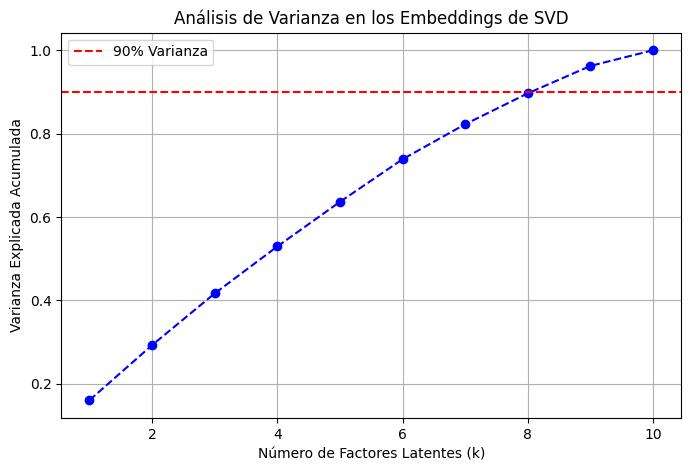

k=1: 0.1608 varianza explicada
k=2: 0.2929 varianza explicada
k=3: 0.4168 varianza explicada
k=4: 0.5294 varianza explicada
k=5: 0.6365 varianza explicada
k=6: 0.7386 varianza explicada
k=7: 0.8226 varianza explicada
k=8: 0.8967 varianza explicada
k=9: 0.9624 varianza explicada
k=10: 1.0000 varianza explicada


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, Reader

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar SVD con un k alto (k=10)
k_max = 10  # Probamos hasta 10 dimensiones
algo = SVD(n_factors=k_max, random_state=42)
algo.fit(trainset)

# üîπ Obtener los valores singulares œÉ de la matriz de embeddings (descomposici√≥n SVD)
singular_values = np.linalg.svd(algo.qi, compute_uv=False)  # `algo.qi` contiene los embeddings de pel√≠culas

# üîπ Calcular la varianza explicada
explained_variance = (singular_values ** 2) / np.sum(singular_values ** 2)
cumulative_variance = np.cumsum(explained_variance)  # Varianza acumulada

# üîπ Graficar la varianza explicada por cada dimensi√≥n
plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("N√∫mero de Factores Latentes (k)")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("An√°lisis de Varianza en los Embeddings de SVD")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Varianza")
plt.legend()
plt.grid()
plt.show()

# üîπ Imprimir la varianza acumulada para los primeros k valores
for i in range(k_max):
    print(f"k={i+1}: {cumulative_variance[i]:.4f} varianza explicada")


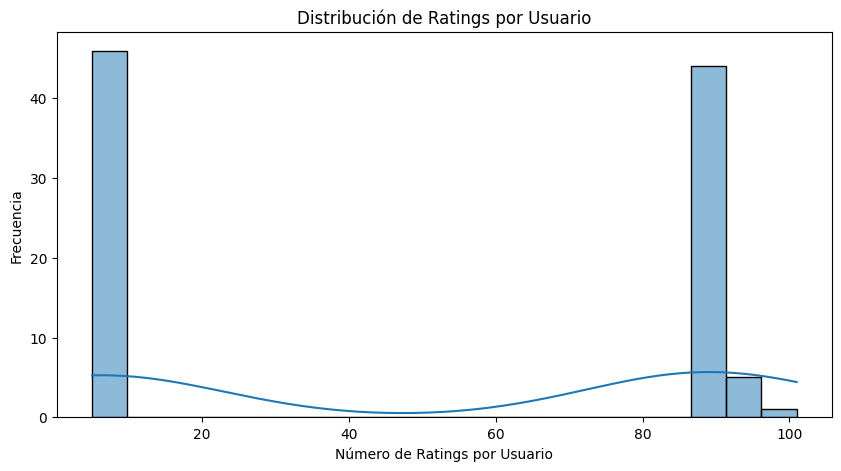

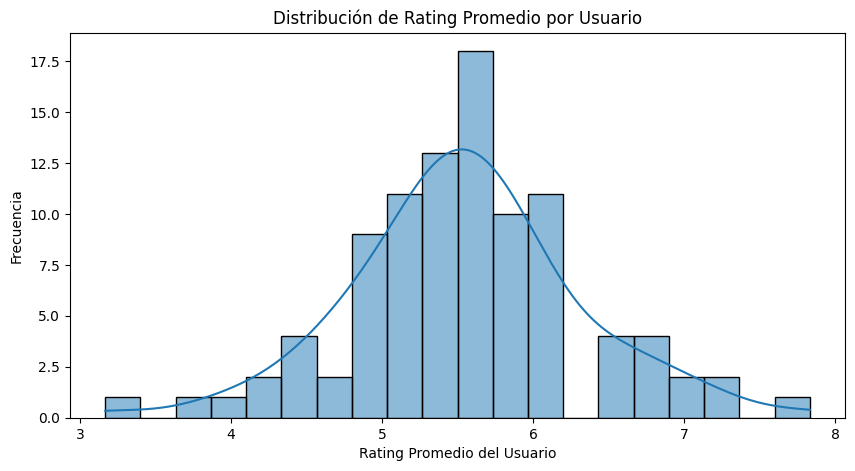

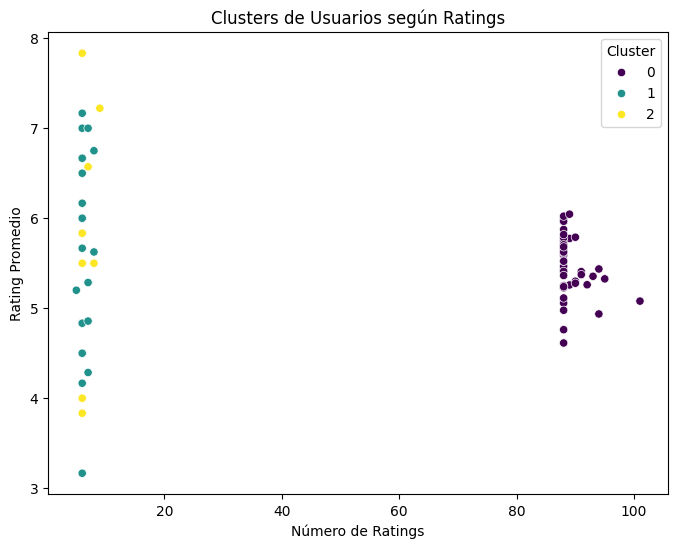


Usuarios con preferencias de g√©nero m√°s marcadas:
total_movies    96
Name: count, dtype: int64


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ 1Ô∏è‚É£ An√°lisis de Distribuci√≥n de Ratings por Usuario
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# üîπ Visualizaci√≥n: Distribuci√≥n de Cantidad de Ratings por Usuario
plt.figure(figsize=(10, 5))
sns.histplot(user_stats["total_ratings"], bins=20, kde=True)
plt.xlabel("N√∫mero de Ratings por Usuario")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Ratings por Usuario")
plt.show()

# üîπ Visualizaci√≥n: Distribuci√≥n de Promedio de Ratings por Usuario
plt.figure(figsize=(10, 5))
sns.histplot(user_stats["avg_rating"], bins=20, kde=True)
plt.xlabel("Rating Promedio del Usuario")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Rating Promedio por Usuario")
plt.show()

# üîπ 2Ô∏è‚É£ Clustering de Usuarios
# Normalizar features para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_stats["cluster"] = kmeans.fit_predict(user_features)

# üîπ Visualizaci√≥n de Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_stats, x="total_ratings", y="avg_rating", hue="cluster", palette="viridis")
plt.xlabel("N√∫mero de Ratings")
plt.ylabel("Rating Promedio")
plt.title("Clusters de Usuarios seg√∫n Ratings")
plt.legend(title="Cluster")
plt.show()

# üîπ 3Ô∏è‚É£ Analizar Usuarios con Preferencias Muy Marcadas (G√©neros Dominantes)
genre_columns = [col for col in df.columns if "genre_" in col]
df["total_movies"] = 1  # Contador de pel√≠culas vistas por usuario

user_genre_prefs = df.groupby("user")[genre_columns + ["total_movies"]].sum()
user_genre_prefs = user_genre_prefs.div(user_genre_prefs["total_movies"], axis=0)  # Proporci√≥n por g√©nero

# üîπ Mostrar los usuarios con preferencias m√°s marcadas
top_genre_users = user_genre_prefs.idxmax(axis=1).value_counts()
print("\nUsuarios con preferencias de g√©nero m√°s marcadas:")
print(top_genre_users)


### üìä **An√°lisis del Perfil de Usuarios en el Dataset**  

üìå **Hallazgos Clave:**  
‚úÖ **Distribuci√≥n de Ratings por Usuario:**  
   - Hay **dos grupos muy marcados**:  
     - **Usuarios con pocas calificaciones (~1-10).**  
     - **Usuarios con muchas calificaciones (~80-100).**  
   - Esto indica que tenemos **usuarios casuales y cin√©filos activos.**  

‚úÖ **Distribuci√≥n de Rating Promedio por Usuario:**  
   - La mayor√≠a de los usuarios tienen un **rating promedio entre 5 y 6.**  
   - No hay muchos usuarios que punt√∫en **muy alto o muy bajo constantemente.**  

‚úÖ **Clustering de Usuarios:**  
   - **Grupo 0:** Usuarios con muchas calificaciones.  
   - **Grupo 1:** Usuarios con pocas calificaciones y tendencia a ratings variados.  
   - **Grupo 2:** Usuarios con pocas calificaciones y tendencia a ratings altos.  

‚úÖ **Preferencias de G√©nero:**  
   - **No se detect√≥ un grupo dominante en un solo g√©nero.**  
   - Todos los usuarios han calificado m√∫ltiples g√©neros, lo que indica que **el filtrado basado en g√©nero no es suficiente por s√≠ solo.**  

---


üìå **Personalizar las Recomendaciones seg√∫n el Tipo de Usuario:**  

| **Tipo de Usuario**        | **Estrategia de Recomendaci√≥n**                                      |
|---------------------------|----------------------------------------------------------------|
| **Usuarios casuales (pocos ratings)** | Recomendaciones m√°s seguras (pel√≠culas populares y bien valoradas). |
| **Usuarios cin√©filos (muchos ratings)** | M√°s exploraci√≥n, incluyendo pel√≠culas menos populares. |
| **Usuarios con rating alto promedio** | Priorizar recomendaciones de pel√≠culas con ratings altos. |
| **Usuarios con rating bajo promedio** | Ofrecer pel√≠culas variadas, no solo las mejor puntuadas. |

üìå **Pr√≥xima Prueba: Aplicar Estrategia Diferenciada seg√∫n Tipo de Usuario**  
‚úÖ **Usuarios casuales ‚Üí `80% SVD + 20% Popularidad`.**  
‚úÖ **Usuarios cin√©filos ‚Üí `50% SVD + 50% Contenido`.**  
‚úÖ **Usuarios con ratings altos ‚Üí `60% SVD + 40% Pel√≠culas con buen avg_rating`.**  


In [65]:
# 572/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")

# üîπ Normalizar nuevas features
for col in ["avg_rating_by_user", "avg_rating_by_movie", "popularity"]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# üîπ Crear estad√≠sticas de usuarios
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# üîπ Normalizar datos para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# üîπ Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_stats["cluster"] = kmeans.fit_predict(user_features)

# üîπ Mapear usuarios a clusters
user_cluster_map = dict(zip(user_stats["user"], user_stats["cluster"]))

# üîπ Configurar Surprise Dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

# üîπ Entrenar modelo SVD con k=1
algo = SVD(n_factors=2, random_state=42)
algo.fit(trainset)

# üîπ Generar matriz de similitud entre pel√≠culas con nuevas features
movie_features = df[['normalized_year', 'avg_rating_by_movie', 'popularity'] + [col for col in df.columns if 'genre_' in col]]
sim_matrix = cosine_similarity(movie_features)

# üîπ Mapeo de pel√≠culas a √≠ndices
movie_index = {name: i for i, name in enumerate(df['name'].unique())}

# üîπ Generar predicciones personalizadas seg√∫n tipo de usuario
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()
    
    # **Predicci√≥n SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # **Predicci√≥n Basada en Contenido**
    top_svd_movies = sorted(scores_svd, key=scores_svd.get, reverse=True)[:5]
    scores_content = {movie: np.mean([sim_matrix[movie_index[movie], movie_index[top_movie]] 
                                      for top_movie in top_svd_movies if movie in movie_index]) 
                      for movie in all_movies}

    # **Ponderaciones seg√∫n tipo de usuario**
    cluster = user_cluster_map.get(user, 0)  # Si no est√° en los clusters, lo tratamos como 0 (casual)
    
    if cluster == 0:  # Usuarios casuales
        final_scores = {movie: 0.8 * scores_svd[movie] + 0.2 * df.loc[df["name"] == movie, "popularity"].mean()
                        for movie in all_movies}
    
    elif cluster == 1:  # Usuarios cin√©filos
        final_scores = {movie: 0.5 * scores_svd[movie] + 0.5 * scores_content.get(movie, 0)
                        for movie in all_movies}
    
    elif cluster == 2:  # Usuarios con rating alto promedio
        final_scores = {movie: 0.6 * scores_svd[movie] + 0.4 * df.loc[df["name"] == movie, "avg_rating_by_movie"].mean()
                        for movie in all_movies}

    # **Seleccionar las 3 mejores recomendaciones asegurando que sean √∫nicas**
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Eliminar repeticiones
    
    predictions[user] = selected_movies

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con personalizaci√≥n basada en tipo de usuario.")


‚úÖ Predicciones generadas con personalizaci√≥n basada en tipo de usuario.


/tmp/ipykernel_1256/3330455573.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="cluster", y="rating", palette="Set2")


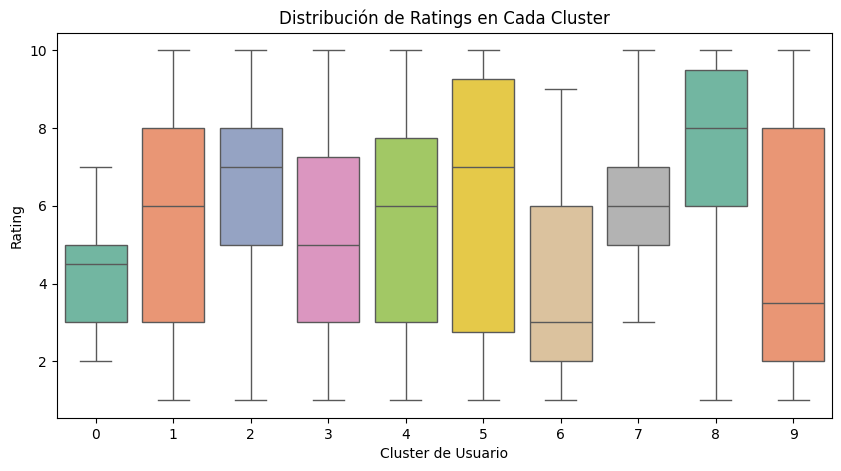

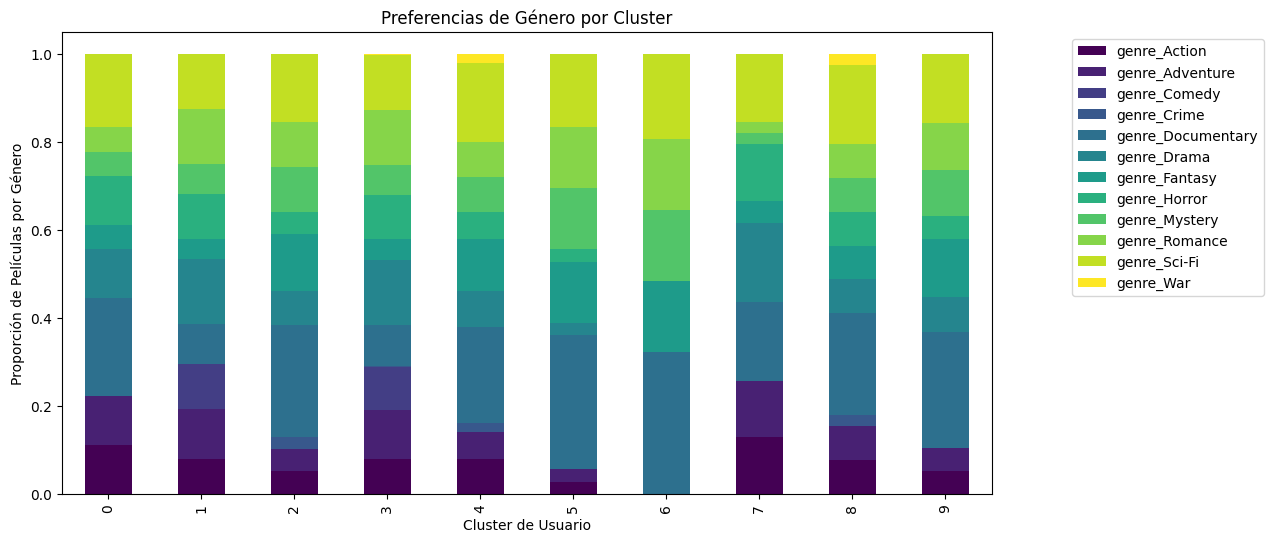

/tmp/ipykernel_1256/3330455573.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_diversity.index, y=user_diversity.values, palette="coolwarm")


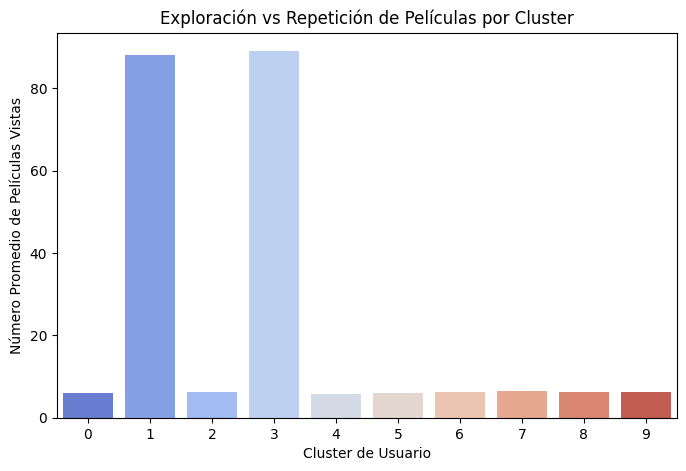


üìä **Promedio de diversidad en cada cluster:**
cluster
0     6.000000
1    88.076923
2     6.333333
3    89.083333
4     5.875000
5     6.000000
6     6.200000
7     6.500000
8     6.333333
9     6.166667
Name: name, dtype: float64


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ Crear estad√≠sticas de usuarios
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# üîπ Normalizar datos para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# üîπ Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
user_stats["cluster"] = kmeans.fit_predict(user_features)

# üîπ Mapear usuarios a clusters
user_cluster_map = dict(zip(user_stats["user"], user_stats["cluster"]))

# üîπ Unir la info de clusters con `df`
df["cluster"] = df["user"].map(user_cluster_map)

# üîπ 1Ô∏è‚É£ An√°lisis de Distribuci√≥n de Ratings en Cada Cluster
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="cluster", y="rating", palette="Set2")
plt.xlabel("Cluster de Usuario")
plt.ylabel("Rating")
plt.title("Distribuci√≥n de Ratings en Cada Cluster")
plt.show()

# üîπ 2Ô∏è‚É£ An√°lisis de Preferencia de G√©neros en Cada Cluster
genre_columns = [col for col in df.columns if "genre_" in col]

cluster_genre_prefs = df.groupby("cluster")[genre_columns].sum()
cluster_genre_prefs = cluster_genre_prefs.div(cluster_genre_prefs.sum(axis=1), axis=0)  # Proporci√≥n por g√©nero

cluster_genre_prefs.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Cluster de Usuario")
plt.ylabel("Proporci√≥n de Pel√≠culas por G√©nero")
plt.title("Preferencias de G√©nero por Cluster")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

# üîπ 3Ô∏è‚É£ Exploraci√≥n vs Conservadurismo en Cada Cluster
user_diversity = df.groupby(["user", "cluster"])["name"].nunique().reset_index()
user_diversity = user_diversity.groupby("cluster")["name"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=user_diversity.index, y=user_diversity.values, palette="coolwarm")
plt.xlabel("Cluster de Usuario")
plt.ylabel("N√∫mero Promedio de Pel√≠culas Vistas")
plt.title("Exploraci√≥n vs Repetici√≥n de Pel√≠culas por Cluster")
plt.show()

print("\nüìä **Promedio de diversidad en cada cluster:**")
print(user_diversity)


In [50]:
user_cluster_counts = user_stats["cluster"].value_counts().sort_index()
print(user_cluster_counts)


cluster
0     3
1    26
2     6
3    24
4     8
5     6
6     5
7     6
8     6
9     6
Name: count, dtype: int64


<Axes: title={'center': 'Promedio de Pel√≠culas Vistas por G√©nero'}>

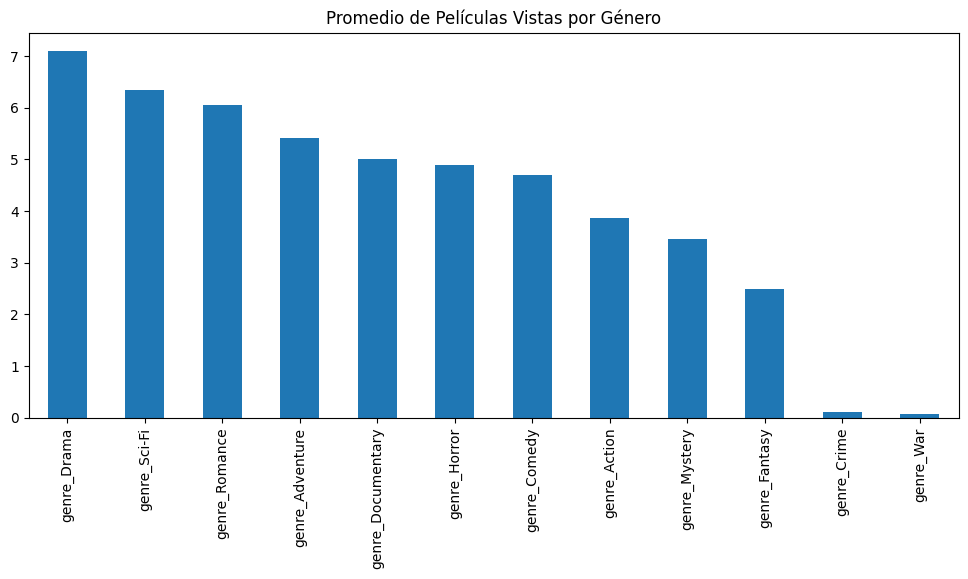

In [51]:
genre_distribution = df.groupby("user")[genre_columns].sum()
genre_distribution.mean().sort_values(ascending=False).plot(kind="bar", figsize=(12,5), title="Promedio de Pel√≠culas Vistas por G√©nero")


In [54]:
# üîπ Calcular Popularidad y Rating Promedio de Pel√≠culas
df["popularity"] = df.groupby("name")["rating"].transform("count")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")

# üîπ Normalizar Popularidad
df["popularity"] = (df["popularity"] - df["popularity"].min()) / (df["popularity"].max() - df["popularity"].min())


# üîπ Seleccionar solo columnas num√©ricas
numeric_df = df.select_dtypes(include=["number"])

# üîπ Calcular matriz de correlaci√≥n
correlation_matrix = numeric_df.corr()

# üîπ Mostrar correlaciones espec√≠ficas
print(correlation_matrix[["rating", "popularity", "avg_rating_by_movie"]])



                       rating  popularity  avg_rating_by_movie
rating               1.000000    0.029324             0.151266
production_year      0.001440   -0.087360             0.017946
normalized_year      0.001440   -0.087360             0.017946
cluster             -0.049338    0.153075             0.052386
popularity           0.029324    1.000000             0.193859
avg_rating_by_movie  0.151266    0.193859             1.000000


In [69]:
# üîπ Revisar si hay valores NaN en la tabla antes de graficar
print("Valores NaN en cluster_diversity:\n", cluster_diversity.isna().sum())

# üîπ Rellenar valores NaN con 0 (si tiene sentido en este contexto)
cluster_diversity = cluster_diversity.fillna(0)

# üîπ Verificar si la tabla est√° vac√≠a
if cluster_diversity.empty:
    print("‚ö†Ô∏è Advertencia: cluster_diversity est√° vac√≠o. No se puede graficar.")
else:
    plt.figure(figsize=(12,5))
    sns.heatmap(cluster_diversity.T, cmap="coolwarm", annot=True)
    plt.title("Promedio de pel√≠culas vistas por g√©nero en cada cluster")
    plt.show()


Valores NaN en cluster_diversity:
 genre_Action         0
genre_Adventure      0
genre_Comedy         0
genre_Crime          0
genre_Documentary    0
genre_Drama          0
genre_Fantasy        0
genre_Horror         0
genre_Mystery        0
genre_Romance        0
genre_Sci-Fi         0
genre_War            0
dtype: int64
‚ö†Ô∏è Advertencia: cluster_diversity est√° vac√≠o. No se puede graficar.


Usuarios por cluster:
 cluster
0    50
1    30
2    16
Name: count, dtype: int64


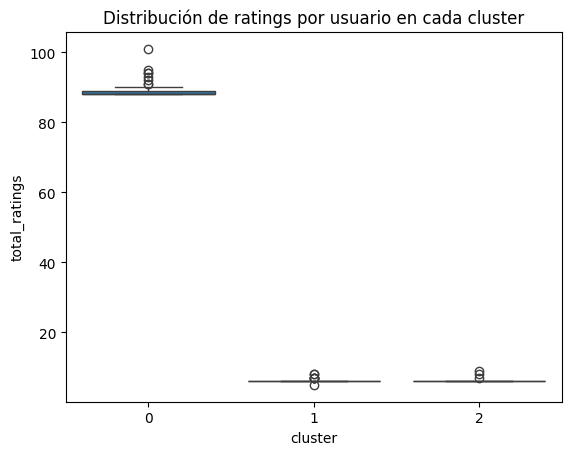

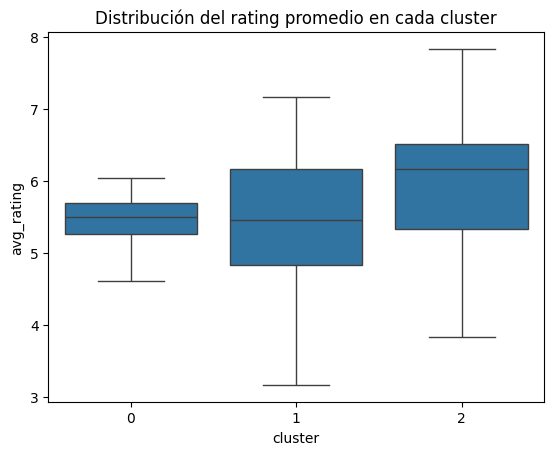

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x500 with 0 Axes>

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# üîπ Contar usuarios en cada cluster
user_cluster_counts = user_stats["cluster"].value_counts().sort_index()
print("Usuarios por cluster:\n", user_cluster_counts)

# üîπ Comparar total de ratings por cluster
sns.boxplot(x=user_stats["cluster"], y=user_stats["total_ratings"])
plt.title("Distribuci√≥n de ratings por usuario en cada cluster")
plt.show()

# üîπ Comparar rating promedio por cluster
sns.boxplot(x=user_stats["cluster"], y=user_stats["avg_rating"])
plt.title("Distribuci√≥n del rating promedio en cada cluster")
plt.show()

# üîπ Comparar diversidad de pel√≠culas vistas por cluster
genre_distribution = df.groupby("user")[genre_columns].sum()
cluster_diversity = genre_distribution.groupby(user_stats["cluster"]).mean()

plt.figure(figsize=(12,5))
sns.heatmap(cluster_diversity.T, cmap="coolwarm", annot=True)
plt.title("Promedio de pel√≠culas vistas por g√©nero en cada cluster")
plt.show()


üìå Top 10 pel√≠culas m√°s recomendadas:
 The Shawshank Redemption    119
Memento                     100
The Lion King               100
A Separation                 33
It's a Wonderful Life        19
Alien                        11
Double Indemnity              9
North by Northwest            9
Modern Times                  8
The Great Dictator            6
Name: count, dtype: int64


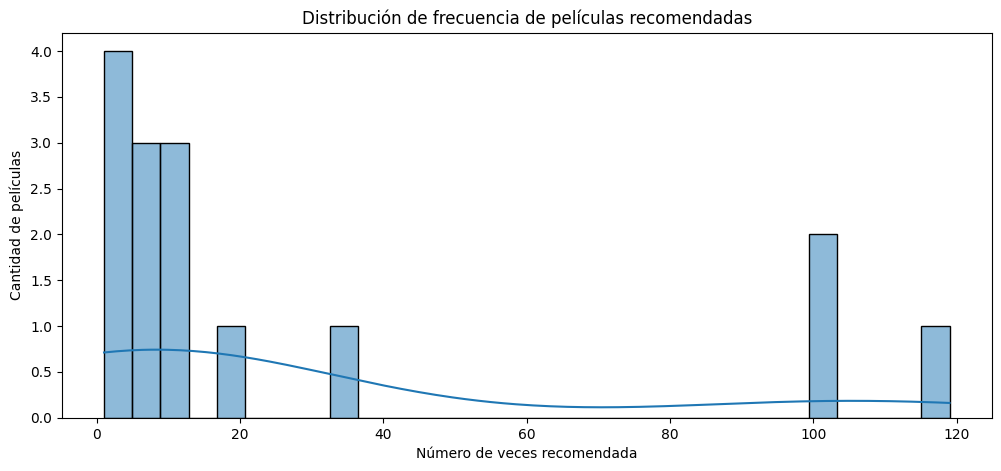

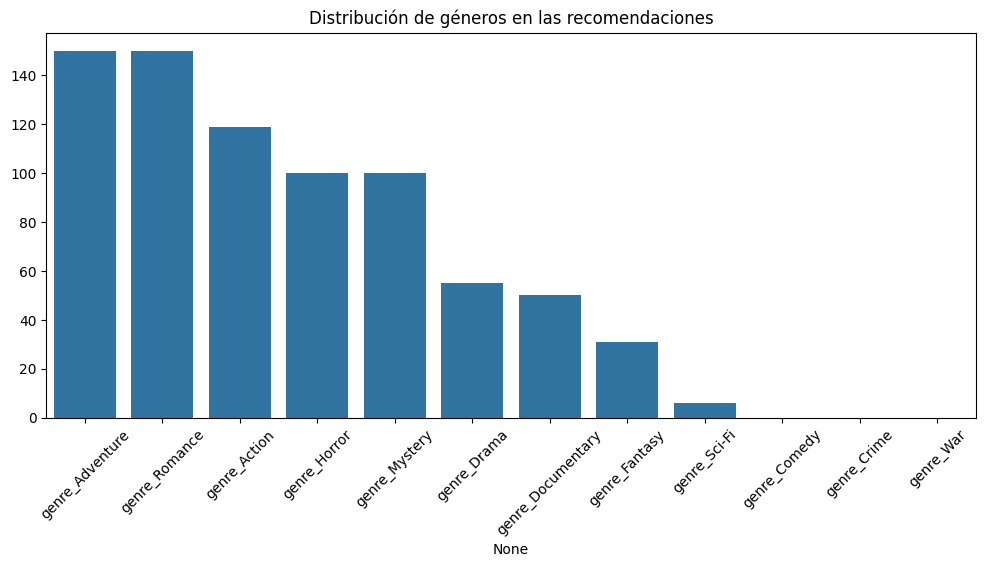

In [67]:
# üîπ Contar cu√°ntas veces se recomienda cada pel√≠cula
recommended_movies = pd.Series([movie for recs in predictions.values() for movie in recs])
movie_counts = recommended_movies.value_counts()

# üîπ Mostrar las 10 pel√≠culas m√°s recomendadas
print("üìå Top 10 pel√≠culas m√°s recomendadas:\n", movie_counts.head(10))

# üîπ Visualizar la distribuci√≥n de recomendaciones
plt.figure(figsize=(12,5))
sns.histplot(movie_counts, bins=30, kde=True)
plt.title("Distribuci√≥n de frecuencia de pel√≠culas recomendadas")
plt.xlabel("N√∫mero de veces recomendada")
plt.ylabel("Cantidad de pel√≠culas")
plt.show()

# üîπ Diversidad en g√©neros recomendados
recommended_genres = df[df["name"].isin(recommended_movies)]
genre_distribution = recommended_genres[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values)
plt.xticks(rotation=45)
plt.title("Distribuci√≥n de g√©neros en las recomendaciones")
plt.show()


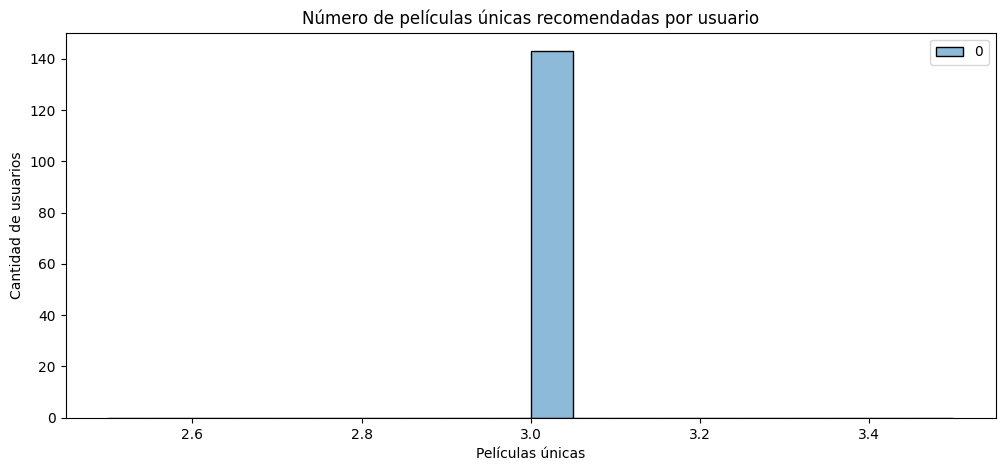

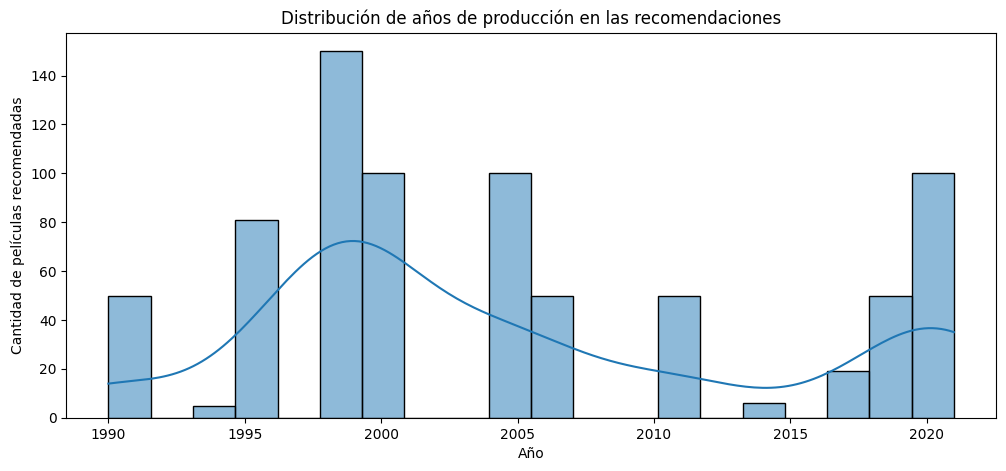

üìå Porcentaje de pel√≠culas recomendadas por g√©nero:
 genre_Action         0.156373
genre_Adventure      0.197109
genre_Comedy         0.000000
genre_Crime          0.000000
genre_Documentary    0.065703
genre_Drama          0.072273
genre_Fantasy        0.040736
genre_Horror         0.131406
genre_Mystery        0.131406
genre_Romance        0.197109
genre_Sci-Fi         0.007884
genre_War            0.000000
dtype: float64


In [68]:
# üîπ Ver cu√°ntos usuarios reciben pel√≠culas repetidas
unique_recs = {user: len(set(recs)) for user, recs in predictions.items()}
plt.figure(figsize=(12,5))
sns.histplot(unique_recs.values(), bins=20, kde=True)
plt.title("N√∫mero de pel√≠culas √∫nicas recomendadas por usuario")
plt.xlabel("Pel√≠culas √∫nicas")
plt.ylabel("Cantidad de usuarios")
plt.show()

# üîπ Analizar distribuci√≥n de a√±os de las pel√≠culas recomendadas
recommended_years = df[df["name"].isin(recommended_movies)]["production_year"]

plt.figure(figsize=(12,5))
sns.histplot(recommended_years, bins=20, kde=True)
plt.title("Distribuci√≥n de a√±os de producci√≥n en las recomendaciones")
plt.xlabel("A√±o")
plt.ylabel("Cantidad de pel√≠culas recomendadas")
plt.show()

# üîπ Evaluar si un g√©nero espec√≠fico domina las recomendaciones
genre_percentages = recommended_genres[genre_columns].sum() / len(recommended_genres)
print("üìå Porcentaje de pel√≠culas recomendadas por g√©nero:\n", genre_percentages)


üìä Distribuci√≥n con 4 clusters:
cluster_4
1    50
3    21
0    15
2    10
Name: count, dtype: int64

üìä Distribuci√≥n con 5 clusters:
cluster_5
1    50
4    15
3    15
0    10
2     6
Name: count, dtype: int64


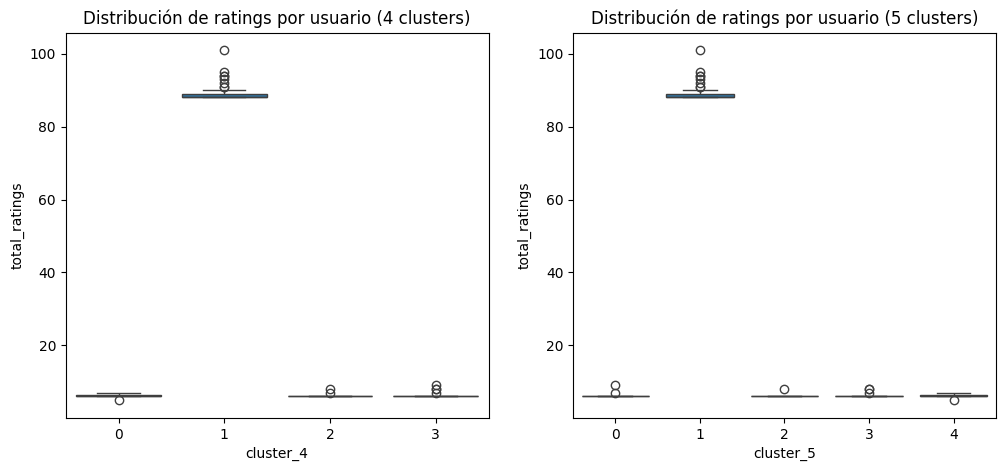

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ Crear estad√≠sticas de usuarios
user_stats = df.groupby("user").agg(
    total_ratings=("rating", "count"),
    avg_rating=("rating", "mean"),
    std_rating=("rating", "std")
).reset_index()

# üîπ Normalizar datos para clustering
scaler = StandardScaler()
user_features = scaler.fit_transform(user_stats[["total_ratings", "avg_rating", "std_rating"]].fillna(0))

# üîπ Aplicar KMeans con 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
user_stats["cluster_4"] = kmeans_4.fit_predict(user_features)

# üîπ Aplicar KMeans con 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
user_stats["cluster_5"] = kmeans_5.fit_predict(user_features)

# üîπ Analizar la distribuci√≥n de usuarios en cada cluster
print("üìä Distribuci√≥n con 4 clusters:")
print(user_stats["cluster_4"].value_counts())

print("\nüìä Distribuci√≥n con 5 clusters:")
print(user_stats["cluster_5"].value_counts())

# üîπ Visualizar la distribuci√≥n de ratings en cada cluster
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=user_stats, x="cluster_4", y="total_ratings", ax=axes[0])
axes[0].set_title("Distribuci√≥n de ratings por usuario (4 clusters)")

sns.boxplot(data=user_stats, x="cluster_5", y="total_ratings", ax=axes[1])
axes[1].set_title("Distribuci√≥n de ratings por usuario (5 clusters)")

plt.show()


üìä Distribuci√≥n Clustering por G√©nero:
cluster_genre
0    50
1    28
2    18
Name: count, dtype: int64

üìä Distribuci√≥n Clustering por A√±o:
cluster_year
0    54
2    26
1    16
Name: count, dtype: int64


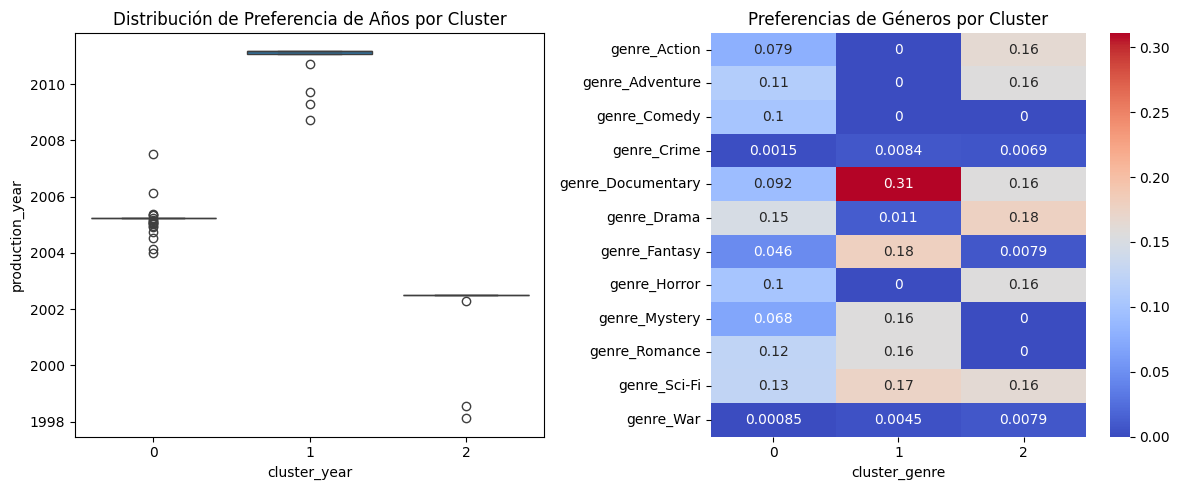

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ Verificar que "user" existe antes de agrupar
if "user" not in df.columns:
    raise KeyError("La columna 'user' no est√° en el DataFrame.")

# üîπ Calcular la media de g√©neros por usuario
genre_columns = [col for col in df.columns if "genre_" in col]
user_genres = df.groupby("user")[genre_columns].mean()

# üîπ Calcular el a√±o promedio de las pel√≠culas vistas por cada usuario
user_years = df.groupby("user", as_index=False)["production_year"].mean()

# üîπ Normalizar los datos antes de aplicar clustering
scaler = StandardScaler()
user_genres_scaled = scaler.fit_transform(user_genres)
user_years_scaled = scaler.fit_transform(user_years[["production_year"]])

# üîπ Aplicar KMeans con 3 clusters en G√©neros
kmeans_genre = KMeans(n_clusters=3, random_state=42, n_init=10)
user_genres["cluster_genre"] = kmeans_genre.fit_predict(user_genres_scaled)

# üîπ Aplicar KMeans con 3 clusters en A√±os de Pel√≠culas
kmeans_year = KMeans(n_clusters=3, random_state=42, n_init=10)
user_years["cluster_year"] = kmeans_year.fit_predict(user_years_scaled)

# üîπ Ver Distribuci√≥n de Clusters por G√©nero
print("üìä Distribuci√≥n Clustering por G√©nero:")
print(user_genres["cluster_genre"].value_counts())

# üîπ Ver Distribuci√≥n de Clusters por A√±o
print("\nüìä Distribuci√≥n Clustering por A√±o:")
print(user_years["cluster_year"].value_counts())

# üîπ Visualizaci√≥n de Clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=user_years, x="cluster_year", y="production_year", ax=axes[0])
axes[0].set_title("Distribuci√≥n de Preferencia de A√±os por Cluster")

sns.heatmap(user_genres.groupby("cluster_genre").mean().T, cmap="coolwarm", annot=True, ax=axes[1])
axes[1].set_title("Preferencias de G√©neros por Cluster")

plt.tight_layout()
plt.show()


---

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 4746, number of used features: 5
[LightGBM] [Info] Start training from score 5.482512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


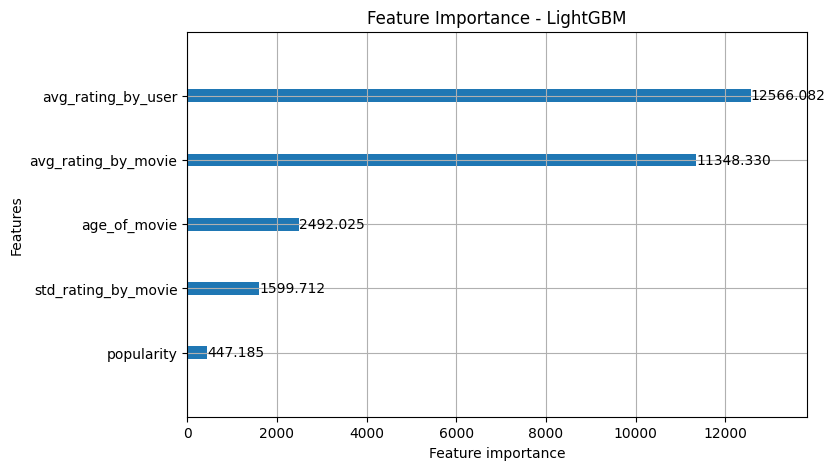

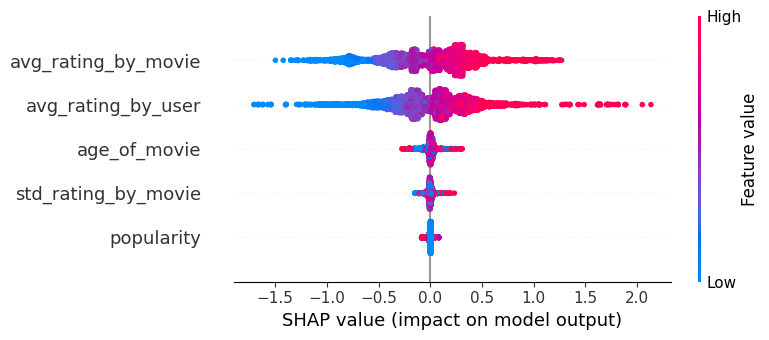

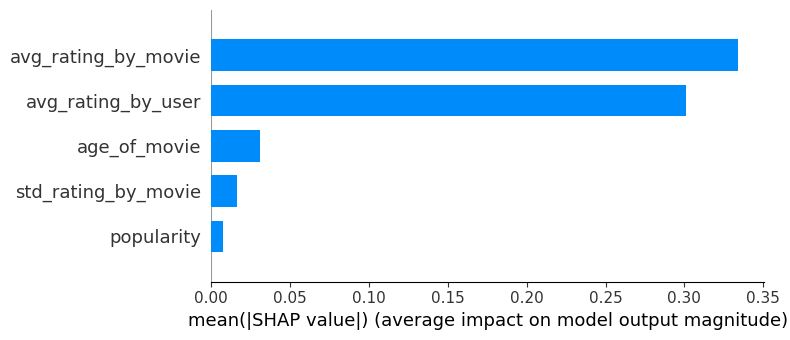

‚úÖ An√°lisis completado. ¬°Revisemos los gr√°ficos!


In [83]:
import lightgbm as lgb
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")
df["std_rating_by_movie"] = df.groupby("name")["rating"].transform("std").fillna(0)
df["age_of_movie"] = 2024 - df["production_year"]

# üîπ Normalizar caracter√≠sticas
feature_cols = ["avg_rating_by_user", "avg_rating_by_movie", "popularity", "std_rating_by_movie", "age_of_movie"]
df[feature_cols] = (df[feature_cols] - df[feature_cols].min()) / (df[feature_cols].max() - df[feature_cols].min())

# üîπ Crear dataset de entrenamiento para LightGBM
X = df[feature_cols]
y = df["rating"]  # Target: la calificaci√≥n del usuario a la pel√≠cula

# üîπ Entrenar modelo LightGBM
train_data = lgb.Dataset(X, label=y)
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "max_depth": 4,  # Reducimos profundidad para evitar sobreajuste
    "num_leaves": 15
}
model = lgb.train(params, train_data, num_boost_round=100)

# üîπ üìä 1Ô∏è‚É£ Importancia de Features de LightGBM
lgb.plot_importance(model, importance_type="gain", figsize=(8, 5))
plt.title("Feature Importance - LightGBM")
plt.show()

# üîπ üìä 2Ô∏è‚É£ An√°lisis con SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)  # Gr√°fico de impacto en predicci√≥n
shap.summary_plot(shap_values, X, plot_type="bar")  # Importancia promedio

print("‚úÖ An√°lisis completado. ¬°Revisemos los gr√°ficos!")


In [123]:
# 661/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# üîπ Cargar datos
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["popularity"] = df.groupby("name")["rating"].transform("count")
df["age_of_movie"] = 2023 - df["production_year"]

# üîπ Normalizar las features
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "popularity", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "popularity", "age_of_movie"]])

# üîπ Modelo LightGBM para pre-ranking
features = ["avg_rating_by_user", "avg_rating_by_movie", "popularity", "age_of_movie"]
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

df["lgb_score"] = lgb_model.predict(X_train)

# üîπ Configurar Surprise Dataset y entrenar SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo = SVD(n_factors=1, random_state=42)
algo.fit(trainset)

# üîπ Generar predicciones personalizadas
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()

    # **Predicci√≥n LightGBM**
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}

    # **Predicci√≥n SVD**
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}

    # **Combinaci√≥n de modelos**
    final_scores = {movie: 0.1 * scores_svd[movie] + 0.9 * scores_lgb[movie] for movie in all_movies}

    # üîπ Ordenar pel√≠culas por puntaje
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)

    # üîπ Asegurar 3 recomendaciones por usuario
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Evita repeticiones

    predictions[user] = selected_movies

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con 3 pel√≠culas por usuario.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 4746, number of used features: 4
[LightGBM] [Info] Start training from score 5.482512
‚úÖ Predicciones generadas con 3 pel√≠culas por usuario.


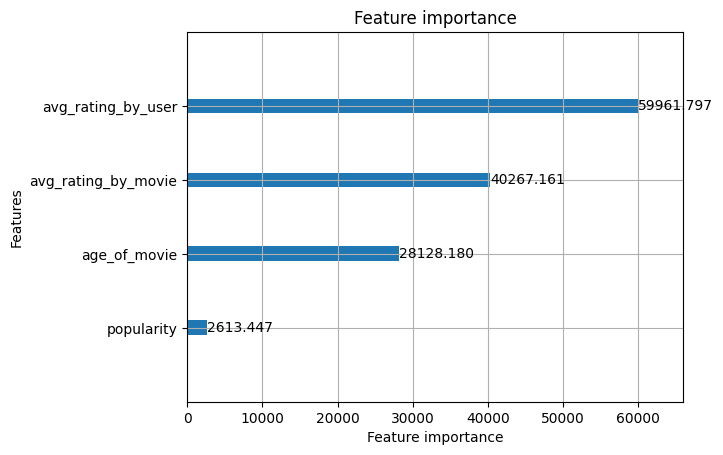

In [94]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgb_model, importance_type="gain")
plt.show()

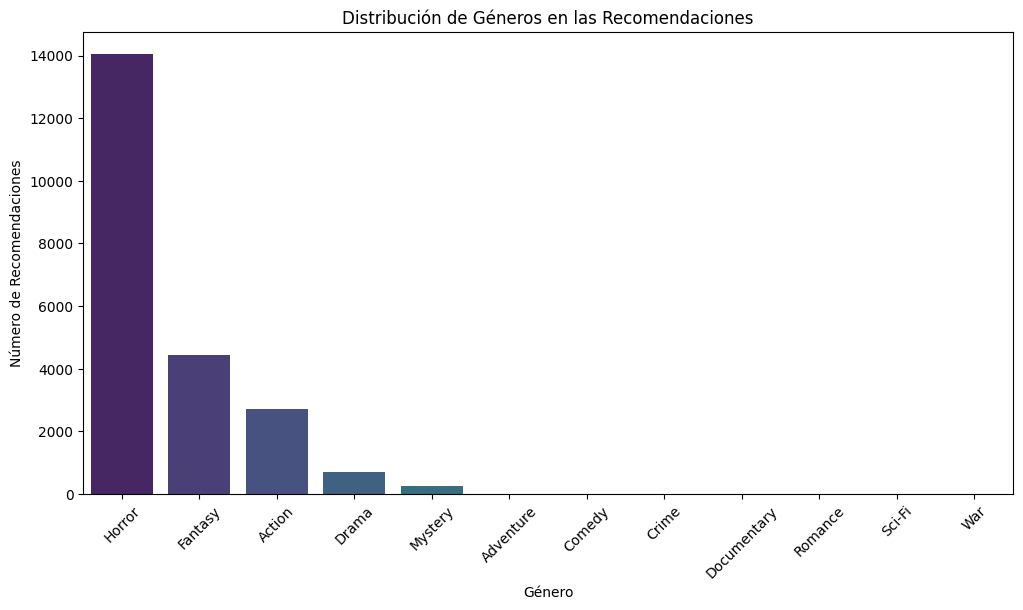

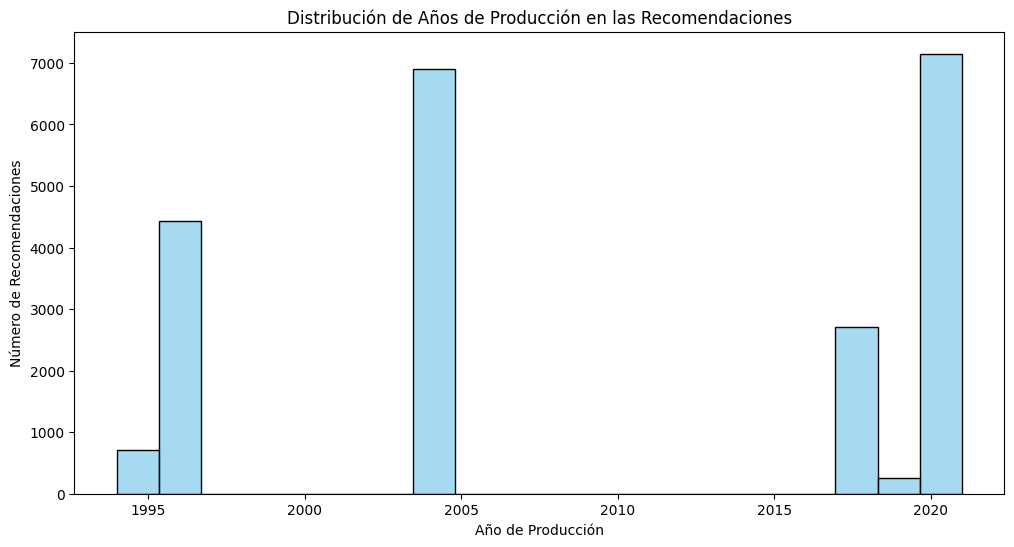

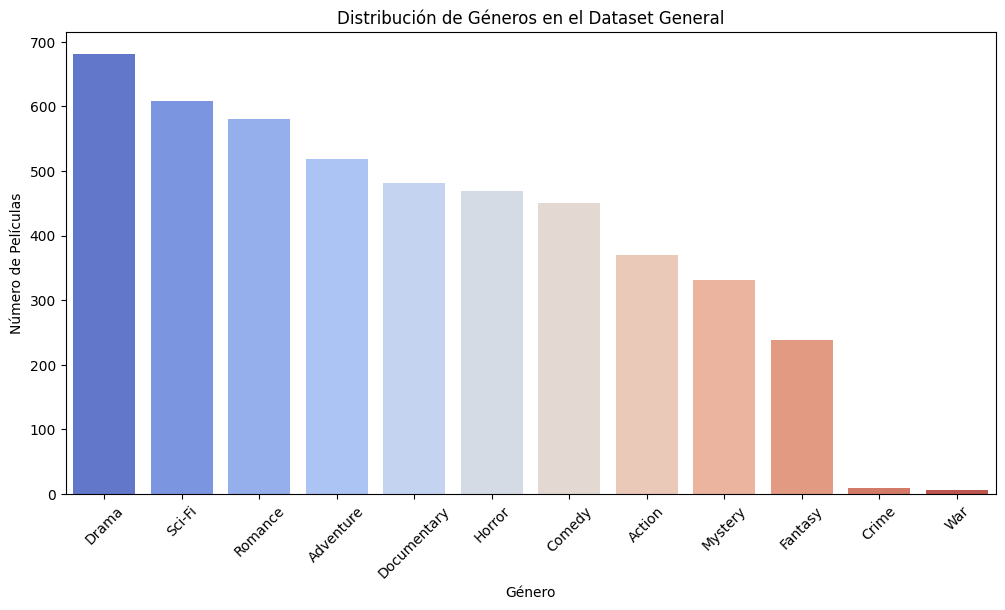

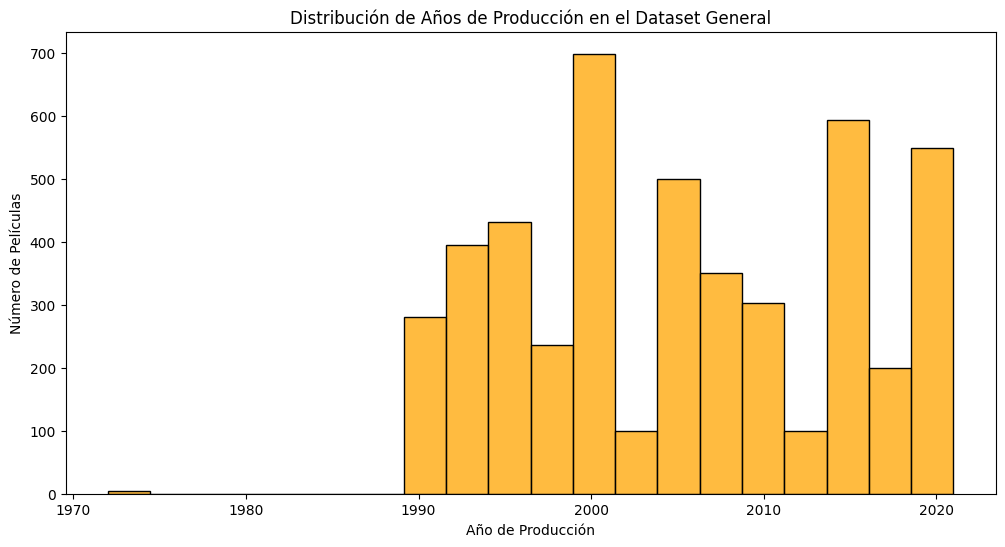

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# üîπ Cargar el dataset original y las recomendaciones
df = pd.read_csv("../data/movies_dataset_clean.csv")

# Cargar las recomendaciones del JSON (asegurando que est√© en el formato correcto)
with open("../predictions/predictions_models/predictions_661.json", "r") as f:
    recommendations = json.load(f)["target"]

# üîπ Convertir las recomendaciones a un DataFrame
recommendation_list = []
for user, movies in recommendations.items():
    for movie in movies:
        recommendation_list.append({"user": user, "name": movie})

recommendation_df = pd.DataFrame(recommendation_list)

# üîπ Fusionar con el dataset original para obtener detalles de las pel√≠culas recomendadas
merged_df = pd.merge(recommendation_df, df, on="name", how="left")

# üîπ An√°lisis de G√©neros
genre_columns = [col for col in df.columns if "genre_" in col]
genre_distribution = merged_df[genre_columns].sum().sort_values(ascending=False)

# üîπ An√°lisis de A√±os de Producci√≥n
year_distribution = merged_df["production_year"].value_counts().sort_index()

# üîπ Visualizaci√≥n de la Distribuci√≥n de G√©neros
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution.index.str.replace("genre_", ""), y=genre_distribution.values, palette="viridis")
plt.title("Distribuci√≥n de G√©neros en las Recomendaciones")
plt.xlabel("G√©nero")
plt.ylabel("N√∫mero de Recomendaciones")
plt.xticks(rotation=45)
plt.show()

# üîπ Visualizaci√≥n de la Distribuci√≥n de A√±os de Producci√≥n
plt.figure(figsize=(12, 6))
sns.histplot(merged_df["production_year"], bins=20, kde=False, color='skyblue')
plt.title("Distribuci√≥n de A√±os de Producci√≥n en las Recomendaciones")
plt.xlabel("A√±o de Producci√≥n")
plt.ylabel("N√∫mero de Recomendaciones")
plt.show()

# üîπ Comparaci√≥n con la distribuci√≥n general del dataset
general_genre_distribution = df[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=general_genre_distribution.index.str.replace("genre_", ""), y=general_genre_distribution.values, palette="coolwarm")
plt.title("Distribuci√≥n de G√©neros en el Dataset General")
plt.xlabel("G√©nero")
plt.ylabel("N√∫mero de Pel√≠culas")
plt.xticks(rotation=45)
plt.show()

# üîπ Comparaci√≥n de A√±os de Producci√≥n en el Dataset General
plt.figure(figsize=(12, 6))
sns.histplot(df["production_year"], bins=20, kde=False, color='orange')
plt.title("Distribuci√≥n de A√±os de Producci√≥n en el Dataset General")
plt.xlabel("A√±o de Producci√≥n")
plt.ylabel("N√∫mero de Pel√≠culas")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 3796, number of used features: 6
[LightGBM] [Info] Start training from score 5.460748
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 3796, number of used features: 10
[LightGBM] [Info] Start training from score 5.460748


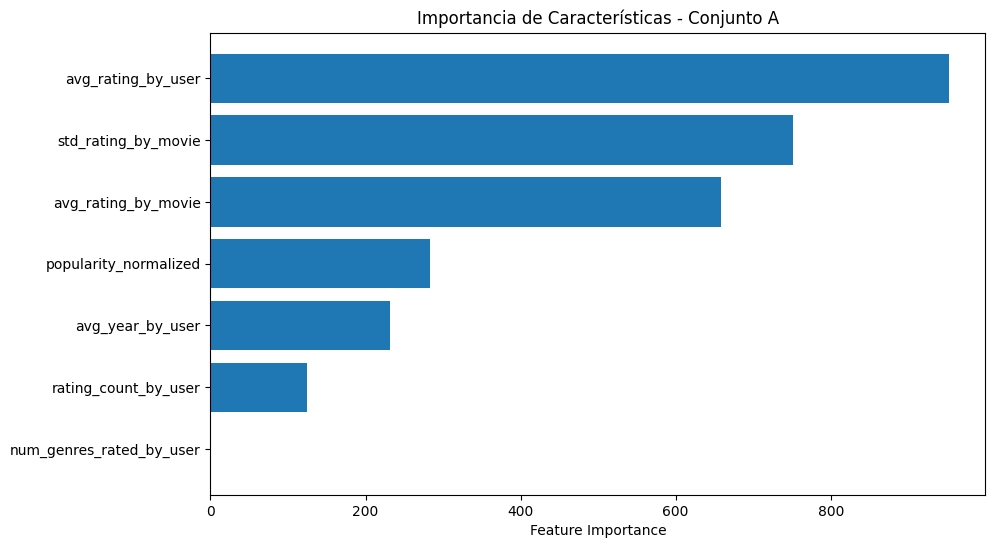

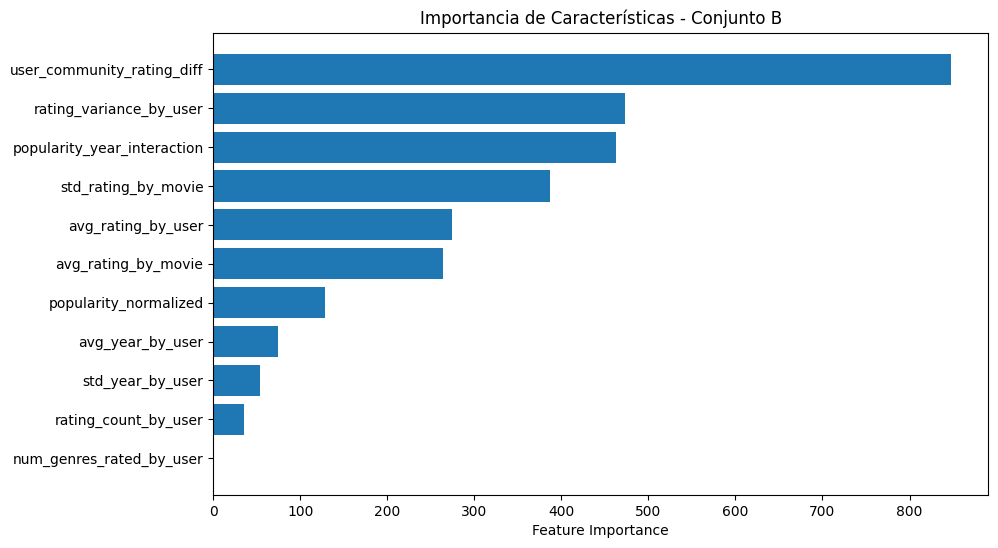

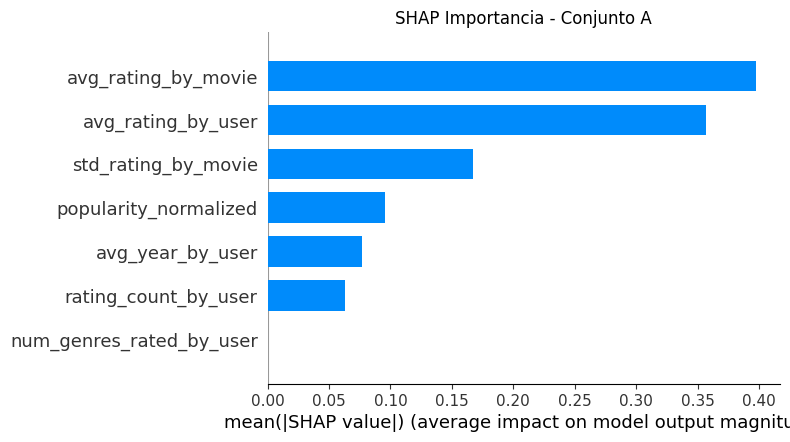

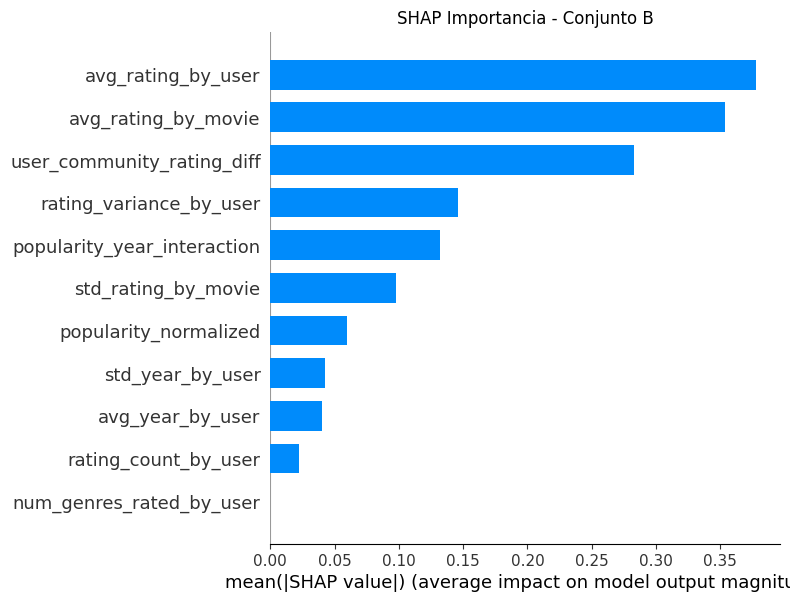

In [119]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# üîπ Cargar datos preprocesados
df = pd.read_csv("../data/movies_dataset_clean.csv")

# üîπ Calcular Caracter√≠sticas Originales y Nuevas
df['avg_rating_by_user'] = df.groupby('user')['rating'].transform('mean')
df['avg_rating_by_movie'] = df.groupby('name')['rating'].transform('mean')
df['std_rating_by_movie'] = df.groupby('name')['rating'].transform('std')
df['popularity'] = df.groupby('name')['rating'].transform('count')
df['popularity_normalized'] = df.groupby('user')['popularity'].transform(lambda x: x / x.mean())
df['avg_year_by_user'] = df.groupby('user')['production_year'].transform('mean')
df['rating_count_by_user'] = df.groupby('user')['rating'].transform('count')
df['num_genres_rated_by_user'] = df[[col for col in df.columns if 'genre_' in col]].sum(axis=1)

# üîπ Nuevas Caracter√≠sticas Avanzadas
df['user_community_rating_diff'] = df['avg_rating_by_user'] - df['avg_rating_by_movie']
df['rating_variance_by_user'] = df.groupby('user')['rating'].transform('var')
df['popularity_year_interaction'] = df['popularity_normalized'] * (2024 - df['production_year'])
df['std_year_by_user'] = df.groupby('user')['production_year'].transform('std')

# üîπ Definir los dos conjuntos de caracter√≠sticas
features_A = [
    'avg_rating_by_user', 'avg_rating_by_movie', 'std_rating_by_movie',
    'popularity_normalized', 'avg_year_by_user', 'rating_count_by_user', 
    'num_genres_rated_by_user'
]

features_B = features_A + [
    'user_community_rating_diff', 'rating_variance_by_user', 
    'popularity_year_interaction', 'std_year_by_user'
]

# üîπ Preparar los datos para ambos conjuntos
X_A = df[features_A]
X_B = df[features_B]
y = df['rating']

# üîπ Dividir en conjunto de entrenamiento y prueba
X_train_A, X_test_A, y_train, y_test = train_test_split(X_A, y, test_size=0.2, random_state=42)
X_train_B, X_test_B, _, _ = train_test_split(X_B, y, test_size=0.2, random_state=42)

# üîπ Entrenar Modelos LightGBM
model_A = lgb.LGBMRegressor(random_state=42)
model_B = lgb.LGBMRegressor(random_state=42)

model_A.fit(X_train_A, y_train)
model_B.fit(X_train_B, y_train)

# üîπ Evaluar Importancia de Caracter√≠sticas
def plot_feature_importance(model, features, title):
    importance_df = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.show()

# üîπ Visualizaci√≥n LightGBM Feature Importance
plot_feature_importance(model_A, features_A, "Importancia de Caracter√≠sticas - Conjunto A")
plot_feature_importance(model_B, features_B, "Importancia de Caracter√≠sticas - Conjunto B")

# üîπ Evaluaci√≥n con SHAP
explainer_A = shap.Explainer(model_A, X_train_A)
shap_values_A = explainer_A(X_test_A)

explainer_B = shap.Explainer(model_B, X_train_B)
shap_values_B = explainer_B(X_test_B)

# üîπ Visualizaci√≥n SHAP
shap.summary_plot(shap_values_A, X_test_A, plot_type='bar', show=False)
plt.title("SHAP Importancia - Conjunto A")
plt.show()

shap.summary_plot(shap_values_B, X_test_B, plot_type='bar', show=False)
plt.title("SHAP Importancia - Conjunto B")
plt.show()


In [160]:
# 665/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# üîπ Cargar datos
df = pd.read_csv("../data/movies_dataset_clean.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
# df["popularity"] = df.groupby("name")["rating"].transform("count")
df["age_of_movie"] = 2023 - df["production_year"]

# üîπ Normalizar caracter√≠sticas
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]])

# üîπ Entrenar modelo LightGBM con par√°metros ajustados
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predicciones de LightGBM
df["lgb_score"] = lgb_model.predict(X_train)

# üîπ Configurar y entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo = SVD(n_factors=10, random_state=42)
algo.fit(trainset)

# üîπ Generar predicciones combinadas
predictions = defaultdict(list)

for user in users_test['user']:
    all_movies = df['name'].unique()

    # Predicci√≥n LightGBM
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}

    # Predicci√≥n SVD
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}

    # Combinaci√≥n de modelos (ajustando el peso)
    final_scores = {movie: 0.1 * scores_svd[movie] + 0.9 * scores_lgb[movie] for movie in all_movies}

    # Ordenar y seleccionar las 3 mejores pel√≠culas
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Asegura que no haya repetidas

    predictions[user] = selected_movies

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con combinaci√≥n ajustada de SVD y LightGBM.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 4746, number of used features: 3
[LightGBM] [Info] Start training from score 5.482512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

---

In [19]:
# 667/900

import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

# üîπ Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Verificar columnas disponibles
print("Columnas en el DataFrame:", df.columns)

# üîπ Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar g√©neros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar caracter√≠sticas
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]])

# üîπ Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predicciones de LightGBM
df["lgb_score"] = lgb_model.predict(X_train)

# üîπ Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=15, random_state=42)
algo.fit(trainset)

# üîπ Filtrado basado en contenido
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genre_matrix.index, columns=movie_genre_matrix.index)

# üîπ Generar predicciones combinadas
predictions = defaultdict(list)
for user in users_test['user']:
    all_movies = df['name'].unique()
    watched_movies = df[df['user'] == user]['name'].unique()
    
    # Predicci√≥n LightGBM
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
    
    # Predicci√≥n SVD
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # Filtrado basado en contenido
    content_scores = {}
    for movie in all_movies:
        if movie not in watched_movies:
            similarity_scores = genre_similarity_df.loc[movie, watched_movies].mean()
            content_scores[movie] = similarity_scores
    
    # Combinaci√≥n de modelos
    final_scores = {
        movie: 0.05 * scores_svd.get(movie, 0) + 
               0.9 * scores_lgb.get(movie, 0) + 
               0.05 * content_scores.get(movie, 0)
        for movie in all_movies
    }
    
    # Ordenar y seleccionar las 3 mejores pel√≠culas
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Asegura que no haya repetidas
    predictions[user] = selected_movies

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)
print("‚úÖ Predicciones generadas con combinaci√≥n ajustada de SVD, LightGBM y filtrado basado en contenido.")

Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [171]:
df.columns

Index(['name', 'user', 'rating', 'theme', 'production_year',
       'avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie', 'Action',
       'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'War', 'lgb_score'],
      dtype='object')

Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

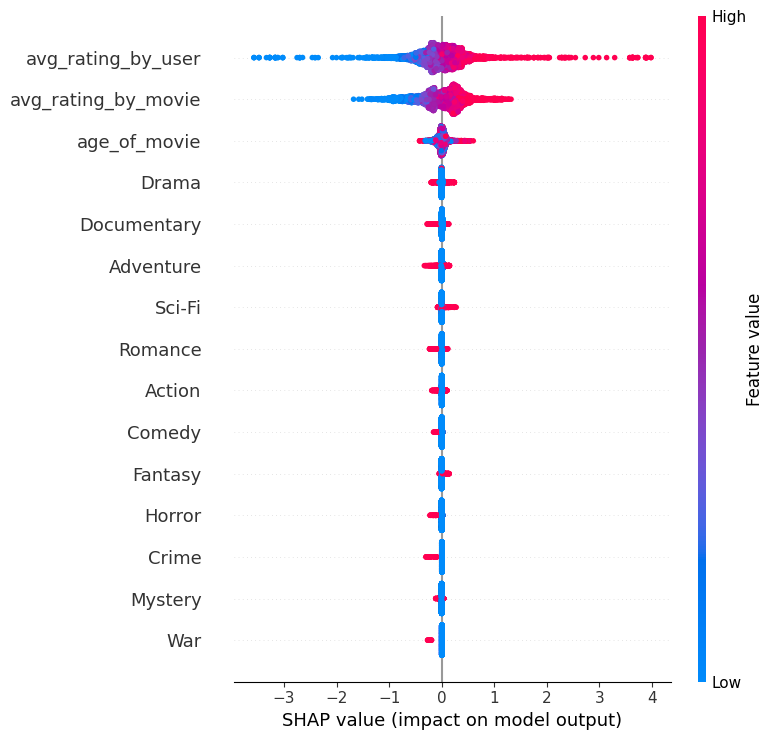

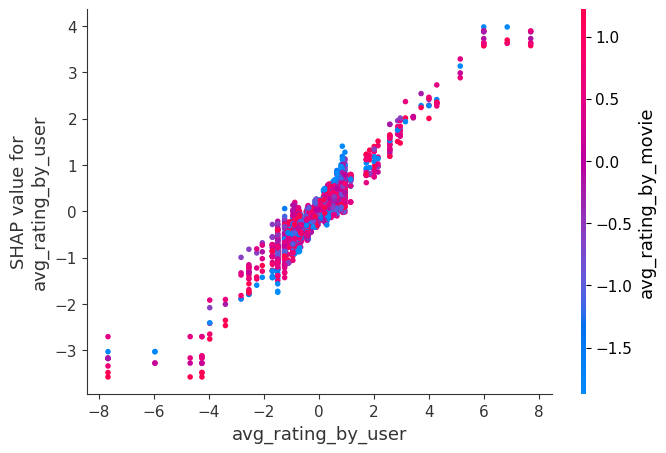

‚úÖ Predicciones generadas con combinaci√≥n ajustada de SVD, LightGBM y filtrado basado en contenido.


In [173]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity
import shap  # Instala con: pip install shap

# üîπ Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")

# üîπ Verificar columnas disponibles
print("Columnas en el DataFrame:", df.columns)

# üîπ Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar g√©neros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']), columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar caracter√≠sticas
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]])

# üîπ Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# üîπ Predicciones de LightGBM
df["lgb_score"] = lgb_model.predict(X_train)

# üîπ Importancia de Caracter√≠sticas (Feature Importance)
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print("Importancia de caracter√≠sticas:")
print(feature_importance)

# üîπ SHAP Values
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_train)

# Visualizaci√≥n de la importancia global de caracter√≠sticas
shap.summary_plot(shap_values, X_train, feature_names=features)

# Visualizaci√≥n de dependencia para una caracter√≠stica espec√≠fica (ejemplo: avg_rating_by_user)
shap.dependence_plot("avg_rating_by_user", shap_values, X_train, feature_names=features)

# üîπ Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=10, random_state=42)
algo.fit(trainset)

# üîπ Filtrado basado en contenido
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genre_matrix.index, columns=movie_genre_matrix.index)

# üîπ Generar predicciones combinadas
predictions = defaultdict(list)
for user in users_test['user']:
    all_movies = df['name'].unique()
    watched_movies = df[df['user'] == user]['name'].unique()
    
    # Predicci√≥n LightGBM
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
    
    # Predicci√≥n SVD
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    # Filtrado basado en contenido
    content_scores = {}
    for movie in all_movies:
        if movie not in watched_movies:
            similarity_scores = genre_similarity_df.loc[movie, watched_movies].mean()
            content_scores[movie] = similarity_scores
    
    # Combinaci√≥n de modelos
    final_scores = {
        movie: 0.1 * scores_svd.get(movie, 0) + 
               0.8 * scores_lgb.get(movie, 0) + 
               0.1 * content_scores.get(movie, 0)
        for movie in all_movies
    }
    
    # Ordenar y seleccionar las 3 mejores pel√≠culas
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))  # Asegura que no haya repetidas
    predictions[user] = selected_movies

# üîπ Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)
print("‚úÖ Predicciones generadas con combinaci√≥n ajustada de SVD, LightGBM y filtrado basado en contenido.")

---

In [3]:
# Calcular preferencias de g√©nero por usuario
user_genre_preferences = df.groupby("user")[mlb.classes_].mean()
user_genre_preferences

Action  Adventure    Comedy  Crime  Documentary     Drama  \
user                                                                   
user1    0.000000   0.000000  0.000000  0.000     0.000000  1.000000   
user10   1.000000   0.000000  0.000000  0.000     0.000000  0.000000   
user100  0.000000   0.000000  0.000000  1.000     0.000000  0.000000   
user103  0.079545   0.113636  0.102273  0.000     0.090909  0.147727   
user104  0.000000   0.000000  0.000000  0.000     0.000000  0.000000   
...           ...        ...       ...    ...          ...       ...   
user92   0.125000   0.125000  0.000000  0.125     0.125000  0.125000   
user93   0.000000   0.000000  0.000000  0.000     0.000000  0.250000   
user94   0.142857   0.142857  0.000000  0.000     0.142857  0.142857   
user95   0.000000   0.000000  0.000000  0.500     0.000000  0.000000   
user97   0.000000   0.000000  0.000000  0.000     0.000000  1.000000   

          Fantasy    Horror   Mystery  Romance    Sci-Fi       War  
user                                                                
user1    0.000000  0.000000  0.000000    0.000  0.000000  0.000000  
user10   0.000000  0.000000  0.000000    0.000  0.000000  0.000000  
user100  0.000000  0.000000  0.000000    0.000  0.000000  0.000000  
user103  0.045455  0.102273  0.068182    0.125  0.125000  0.000000  
user104  0.000000  0.000000  0.000000    0.000  1.000000  0.000000  
...           ...       ...       ...      ...       ...       ...  
user92   0.000000  0.125000  0.000000    0.000  0.250000  0.000000  
user93   0.250000  0.000000  0.000000    0.000  0.500000  0.000000  
user94   0.000000  0.142857  0.000000    0.000  0.142857  0.142857  
user95   0.000000  0.000000  0.000000    0.000  0.500000  0.000000  
user97   0.000000  0.000000  0.000000    0.000  0.000000  0.000000  

[196 rows x 12 columns]

In [4]:
# Calcular diversidad de g√©neros por usuario
df['num_genres'] = df['theme'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)
user_diversity = df.groupby("user")["num_genres"].mean()
user_diversity

user
user1      0.0
user10     0.0
user100    0.0
user103    0.0
user104    0.0
          ... 
user92     0.0
user93     0.0
user94     0.0
user95     0.0
user97     0.0
Name: num_genres, Length: 196, dtype: float64

---

In [2]:
df.describe()

rating  production_year  avg_rating_by_user  avg_rating_by_movie  \
count  4900.000000      4900.000000        4.900000e+03         4.900000e+03   
mean      5.488367      2005.003673       -4.350262e-16        -3.712223e-16   
std       2.846424         9.532167        1.000102e+00         1.000102e+00   
min       1.000000      1972.000000       -7.666832e+00        -2.494658e+00   
25%       3.000000      1997.000000       -4.071686e-01        -5.434149e-01   
50%       5.000000      2004.000000        1.987039e-02         1.228632e-01   
75%       8.000000      2014.000000        3.692659e-01         6.939588e-01   
max      10.000000      2021.000000        7.706573e+00         2.312063e+00   

       age_of_movie       Action    Adventure       Comedy        Crime  \
count  4.900000e+03  4900.000000  4900.000000  4900.000000  4900.000000   
mean   1.276077e-16     0.079388     0.105918     0.091837     0.008163   
std    1.000102e+00     0.270371     0.307765     0.288825     0.089990   
min   -1.678313e+00     0.000000     0.000000     0.000000     0.000000   
25%   -9.438824e-01     0.000000     0.000000     0.000000     0.000000   
50%    1.053041e-01     0.000000     0.000000     0.000000     0.000000   
75%    8.397346e-01     0.000000     0.000000     0.000000     0.000000   
max    3.462701e+00     1.000000     1.000000     1.000000     1.000000   

       Documentary        Drama      Fantasy       Horror      Mystery  \
count  4900.000000  4900.000000  4900.000000  4900.000000  4900.000000   
mean      0.098163     0.148776     0.051224     0.095714     0.067551   
std       0.297566     0.355903     0.220478     0.294229     0.250999   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Romance       Sci-Fi          War    lgb_score  
count  4900.000000  4900.000000  4900.000000  4900.000000  
mean      0.118571     0.130612     0.004082     5.488368  
std       0.323317     0.337010     0.063764     0.788231  
min       0.000000     0.000000     0.000000     1.728159  
25%       0.000000     0.000000     0.000000     5.081184  
50%       0.000000     0.000000     0.000000     5.495092  
75%       0.000000     0.000000     0.000000     5.940179  
max       1.000000     1.000000     1.000000     9.796311

In [3]:
df.head(10)

name     user  rating     theme  production_year  \
0  12 Angry Men  user169       6  [Sci-Fi]             2021   
1  12 Angry Men  user425       9  [Sci-Fi]             2015   
2  12 Angry Men  user321       8  [Sci-Fi]             2021   
3  12 Angry Men  user329       4  [Sci-Fi]             2015   
4  12 Angry Men  user303       1  [Sci-Fi]             2021   
5  12 Angry Men  user410       3  [Sci-Fi]             2021   
6  12 Angry Men  user154       3  [Sci-Fi]             2015   
7  12 Angry Men  user112       7  [Sci-Fi]             2015   
8  12 Angry Men  user283       6  [Sci-Fi]             2015   
9  12 Angry Men  user203       5  [Sci-Fi]             2021   

   avg_rating_by_user  avg_rating_by_movie  age_of_movie  Action  Adventure  \
0           -0.698908             0.789141     -1.678313       0          0   
1           -1.118900             0.789141     -1.048801       0          0   
2            1.728026             0.789141     -1.678313       0          0   
3            0.019870             0.789141     -1.048801       0          0   
4           -1.118900             0.789141     -1.678313       0          0   
5           -3.965827             0.789141     -1.678313       0          0   
6           -2.827056             0.789141     -1.048801       0          0   
7           -0.346163             0.789141     -1.048801       0          0   
8            0.873948             0.789141     -1.048801       0          0   
9            0.589256             0.789141     -1.678313       0          0   

   ...  Crime  Documentary  Drama  Fantasy  Horror  Mystery  Romance  Sci-Fi  \
0  ...      0            0      0        0       0        0        0       1   
1  ...      0            0      0        0       0        0        0       1   
2  ...      0            0      0        0       0        0        0       1   
3  ...      0            0      0        0       0        0        0       1   
4  ...      0            0      0        0       0        0        0       1   
5  ...      0            0      0        0       0        0        0       1   
6  ...      0            0      0        0       0        0        0       1   
7  ...      0            0      0        0       0        0        0       1   
8  ...      0            0      0        0       0        0        0       1   
9  ...      0            0      0        0       0        0        0       1   

   War  lgb_score  
0    0   5.318011  
1    0   5.093569  
2    0   6.775952  
3    0   6.058749  
4    0   4.833293  
5    0   2.566177  
6    0   3.668047  
7    0   5.793355  
8    0   6.297124  
9    0   5.824362  

[10 rows x 21 columns]

In [25]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

# ------------------------------------------------------------------------------
# Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# ------------------------------------------------------------------------------
# Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar g√©neros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar caracter√≠sticas (solo las num√©ricas)
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]]
)

# ------------------------------------------------------------------------------
# Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

# ------------------------------------------------------------------------------
# Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD(n_factors=15, random_state=42)
algo.fit(trainset)

# ------------------------------------------------------------------------------
# Filtrado basado en contenido (usando g√©neros)
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity,
                                   index=movie_genre_matrix.index,
                                   columns=movie_genre_matrix.index)

# ------------------------------------------------------------------------------
# Generar predicciones combinadas con pesos din√°micos
predictions = defaultdict(list)

# Definimos los extremos para la interpolaci√≥n:
THRESHOLD_MIN = 10   # Usuarios con <=10 pel√≠culas vistas (pocos datos)
THRESHOLD_MAX = 50   # Usuarios con >=50 pel√≠culas vistas (muchos datos)

for user in users_test['user']:
    all_movies = df['name'].unique()
    watched_movies = df[df['user'] == user]['name'].unique()
    num_watched = len(watched_movies)
    
    # Calcular el factor de interpolaci√≥n (alpha), limitado entre 0 y 1
    alpha = (num_watched - THRESHOLD_MIN) / (THRESHOLD_MAX - THRESHOLD_MIN)
    alpha = max(0, min(alpha, 1))
    
    # Interpolar pesos:
    # Para usuarios con pocos datos: (LGB: 0.6, SVD: 0.3, Contenido: 0.1)
    # Para usuarios con muchos datos: (LGB: 0.9, SVD: 0.05, Contenido: 0.05)
    weight_lgb = 0.6 + alpha * (0.9 - 0.6)       # va de 0.6 a 0.9
    weight_svd = 0.3 + alpha * (0.05 - 0.3)        # va de 0.3 a 0.05 (disminuye)
    weight_content = 0.1 + alpha * (0.05 - 0.1)    # va de 0.1 a 0.05 (disminuye)
    
    # Calcular scores para cada pel√≠cula:
    scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
    scores_svd = {movie: algo.predict(user, movie).est for movie in all_movies}
    
    content_scores = {}
    for movie in all_movies:
        if movie not in watched_movies:
            similarity_scores = genre_similarity_df.loc[movie, watched_movies].mean()
            content_scores[movie] = similarity_scores
    
    # Combinar las se√±ales con los pesos din√°micos
    final_scores = {
        movie: weight_svd * scores_svd.get(movie, 0) +
               weight_lgb * scores_lgb.get(movie, 0) +
               weight_content * content_scores.get(movie, 0)
        for movie in all_movies
    }
    
    # Ordenar y seleccionar las 3 mejores pel√≠culas (sin duplicados)
    sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
    selected_movies = list(dict.fromkeys(sorted_movies[:3]))
    predictions[user] = selected_movies

# ------------------------------------------------------------------------------
# Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas con pesos din√°micos basados en la cantidad de datos por usuario.")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [30]:
# Definir umbrales para la interpolaci√≥n
THRESHOLD_MIN = 10   # Usuarios con <= 10 pel√≠culas vistas
THRESHOLD_MAX = 50   # Usuarios con >= 50 pel√≠culas vistas

# Calcular la cantidad de ratings (pel√≠culas calificadas) por usuario en el dataset original
user_counts = df.groupby("user")["rating"].count()

# Para cada usuario en el conjunto de prueba, mostrar cu√°ntas pel√≠culas ha calificado y el valor de alpha
for user in users_test['user']:
    # Obtenemos el n√∫mero de pel√≠culas vistas para el usuario (o 0 si no hay registro)
    num_watched = user_counts.get(user, 0)
    # Calcular alpha de forma lineal, limitando entre 0 y 1
    alpha = (num_watched - THRESHOLD_MIN) / (THRESHOLD_MAX - THRESHOLD_MIN)
    alpha = max(0, min(alpha, 1))
    print("User:", user, "Pel√≠culas vistas:", num_watched, "Alpha:", alpha)


User: user169 Pel√≠culas vistas: 101 Alpha: 1
User: user425 Pel√≠culas vistas: 6 Alpha: 0
User: user321 Pel√≠culas vistas: 6 Alpha: 0
User: user329 Pel√≠culas vistas: 6 Alpha: 0
User: user303 Pel√≠culas vistas: 6 Alpha: 0
User: user410 Pel√≠culas vistas: 6 Alpha: 0
User: user112 Pel√≠culas vistas: 7 Alpha: 0
User: user283 Pel√≠culas vistas: 6 Alpha: 0
User: user203 Pel√≠culas vistas: 6 Alpha: 0
User: user375 Pel√≠culas vistas: 94 Alpha: 1
User: user368 Pel√≠culas vistas: 6 Alpha: 0
User: user421 Pel√≠culas vistas: 6 Alpha: 0
User: user288 Pel√≠culas vistas: 6 Alpha: 0
User: user111 Pel√≠culas vistas: 7 Alpha: 0
User: user454 Pel√≠culas vistas: 6 Alpha: 0
User: user164 Pel√≠culas vistas: 6 Alpha: 0
User: user317 Pel√≠culas vistas: 6 Alpha: 0
User: user215 Pel√≠culas vistas: 6 Alpha: 0
User: user58 Pel√≠culas vistas: 6 Alpha: 0
User: user456 Pel√≠culas vistas: 6 Alpha: 0
User: user482 Pel√≠culas vistas: 6 Alpha: 0
User: user221 Pel√≠culas vistas: 6 Alpha: 0
User: user158 Pel√≠culas vista

In [51]:
# 670/900
import pandas as pd
import numpy as np
import json
from surprise import SVD, KNNWithMeans, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

# ------------------------------------------------------------------------------
# Cargar datos
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# ------------------------------------------------------------------------------
# Crear nuevas caracter√≠sticas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar g√©neros
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar caracter√≠sticas (solo las num√©ricas)
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]]
)

# ------------------------------------------------------------------------------
# Entrenar modelo LightGBM
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"] + list(mlb.classes_)
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

# ------------------------------------------------------------------------------
# Entrenar modelo SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()
algo_svd = SVD(n_factors=15, random_state=42)
algo_svd.fit(trainset)

# ------------------------------------------------------------------------------
# Entrenar modelo KNNWithMeans (para la se√±al basada en vecinos)
# Usamos un enfoque basado en √≠tems (user_based=False) y la m√©trica cosine.
sim_options = {'name': 'cosine', 'user_based': False}
algo_knn = KNNWithMeans(k=40, sim_options=sim_options)
algo_knn.fit(trainset)

# ------------------------------------------------------------------------------
# Filtrado basado en contenido (usando g√©neros)
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, 
                                   index=movie_genre_matrix.index, 
                                   columns=movie_genre_matrix.index)

# ------------------------------------------------------------------------------
# Generar predicciones combinadas
predictions = defaultdict(list)

# Obtener n√∫mero de ratings por usuario en el dataset
user_counts = df.groupby("user")["rating"].count()

# Calcular ranking global basado en LightGBM (para fallback si fuera necesario)
all_movies = df['name'].unique()
global_ranking = sorted(all_movies, key=lambda m: df[df["name"] == m]["lgb_score"].mean(), reverse=True)

for user in users_test['user']:
    watched_movies = set(df[df['user'] == user]['name'].unique())
    num_watched = user_counts.get(user, 0)
    
    # Si el usuario tiene menos de 3 ratings, usamos una combinaci√≥n que incluye KNN
    if num_watched <= 3:
        # Calcular los scores para cada pel√≠cula seg√∫n LightGBM, SVD y KNN
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        scores_knn = {movie: algo_knn.predict(user, movie).est for movie in all_movies}
        
        # Filtrado basado en contenido: calcular similitud promedio de la pel√≠cula con las ya vistas
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                similarity_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = similarity_scores
        
        # Asignar pesos para usuarios con pocos datos:
        # Ejemplo: LGB: 0.5, SVD: 0.15, KNN: 0.2, Contenido: 0.15
        final_scores = {
            movie: 0.5 * scores_lgb.get(movie, 0) +
                   0.15 * scores_svd.get(movie, 0) +
                   0.2 * scores_knn.get(movie, 0) +
                   0.15 * content_scores.get(movie, 0)
            for movie in all_movies
        }
        sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
        recommendations = list(dict.fromkeys(sorted_movies[:3]))
    else:
        # Para usuarios con 3 o m√°s ratings, usar la combinaci√≥n original
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                similarity_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = similarity_scores
        
        final_scores = {
            movie: 0.05 * scores_svd.get(movie, 0) +
                   0.9 * scores_lgb.get(movie, 0) +
                   0.05 * content_scores.get(movie, 0)
            for movie in all_movies
        }
        sorted_movies = sorted(final_scores, key=final_scores.get, reverse=True)
        recommendations = list(dict.fromkeys(sorted_movies[:3]))
    
    predictions[user] = recommendations

# ------------------------------------------------------------------------------
# Guardar predicciones en JSON
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ Predicciones generadas incorporando KNN para usuarios con pocos datos.")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

---

In [43]:
import pandas as pd
import numpy as np

# Supongamos que ya tienes cargado el DataFrame df y que se han calculado las siguientes columnas:
# "avg_rating_by_movie", "rating_diff_movie", "interaction_diff", "avg_rating_by_user", "rating_diff_user"

# Si a√∫n no se han calculado, asegur√©monos de calcular las diferencias e interacci√≥n:
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["rating_diff_user"] = df["rating"] - df["avg_rating_by_user"]
df["rating_diff_movie"] = df["rating"] - df["avg_rating_by_movie"]
df["interaction_diff"] = df["rating_diff_user"] * df["rating_diff_movie"]

# Seleccionar las variables dominantes
dominant_vars = ["avg_rating_by_movie", "rating_diff_movie", "interaction_diff",
                 "avg_rating_by_user", "rating_diff_user"]

# Calcular la matriz de correlaci√≥n
corr_matrix = df[dominant_vars].corr()

print("Matriz de Correlaci√≥n entre las variables dominantes:")
print(corr_matrix)


Matriz de Correlaci√≥n entre las variables dominantes:
                     avg_rating_by_movie  rating_diff_movie  interaction_diff  \
avg_rating_by_movie         1.000000e+00      -8.221781e-17          0.005517   
rating_diff_movie          -8.221781e-17       1.000000e+00          0.021513   
interaction_diff            5.516731e-03       2.151300e-02          1.000000   
avg_rating_by_user          1.043663e-02       2.064134e-01          0.000688   
rating_diff_user            1.486873e-01       9.672646e-01          0.022430   

                     avg_rating_by_user  rating_diff_user  
avg_rating_by_movie        1.043663e-02      1.486873e-01  
rating_diff_movie          2.064134e-01      9.672646e-01  
interaction_diff           6.879387e-04      2.242989e-02  
avg_rating_by_user         1.000000e+00      6.530878e-17  
rating_diff_user           6.530878e-17      1.000000e+00  


In [45]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv("../data/movies_dataset.csv")

# Imprimir las columnas originales
print("Columnas originales:", df.columns.tolist())

# Resumen descriptivo de las variables num√©ricas originales
print("\nResumen descriptivo de 'production_year' y 'rating':")
print(df[["production_year", "rating"]].describe())

# An√°lisis de la variable 'theme'
# Convertir la columna 'theme' en listas (si no lo est√° ya)
df['theme_list'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
# Extraer todos los g√©neros en una lista
all_genres = [genre for sublist in df['theme_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
print("\nFrecuencia de g√©neros (theme):")
print(genre_counts)

# Si se desea, podemos agrupar los a√±os de producci√≥n por d√©cadas
df['production_decade'] = (df['production_year'] // 10) * 10
decade_counts = df['production_decade'].value_counts().sort_index()
print("\nN√∫mero de pel√≠culas por d√©cada:")
print(decade_counts)


Columnas originales: ['name', 'user', 'rating', 'theme', 'production_year']

Resumen descriptivo de 'production_year' y 'rating':
       production_year       rating
count      4900.000000  4900.000000
mean       2005.003673     5.488367
std           9.532167     2.846424
min        1972.000000     1.000000
25%        1997.000000     3.000000
50%        2004.000000     5.000000
75%        2014.000000     8.000000
max        2021.000000    10.000000

Frecuencia de g√©neros (theme):
Drama          729
Sci-Fi         640
Romance        581
Adventure      519
Documentary    481
Horror         469
Comedy         450
Action         389
Mystery        331
Fantasy        251
Crime           40
War             20
Name: count, dtype: int64

N√∫mero de pel√≠culas por d√©cada:
production_decade
1970      20
1990    1624
2000    1578
2010    1328
2020     350
Name: count, dtype: int64


In [46]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, KNNWithMeans, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity

#########################################
# 1. Cargar Datos y Preparar Features Base
#########################################
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# Caracter√≠sticas b√°sicas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

#########################################
# 2. Nuevas Features: production_decade y num_genres
#########################################
# production_decade: Agrupamos el production_year en d√©cadas
df["production_decade"] = (df["production_year"].astype(int) // 10) * 10
# One-hot encoding de production_decade
df = pd.get_dummies(df, columns=["production_decade"], prefix="decade")

# num_genres: Contar el n√∫mero de g√©neros asociados a cada pel√≠cula.
# Primero, convertir la columna "theme" en lista:
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
# Asegurarse de que no queden listas vac√≠as:
df['theme'] = df['theme'].apply(lambda x: x if len(x) > 0 else ["unknown"])
df["num_genres"] = df["theme"].apply(len)

#########################################
# 3. Codificar G√©neros
#########################################
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

#########################################
# 4. Normalizar Features Num√©ricas Base
#########################################
# Normalizar las features b√°sicas (avg_rating_by_user, avg_rating_by_movie, age_of_movie)
scaler = StandardScaler()
df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie", "num_genres"]] = scaler.fit_transform(
    df[["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie", "num_genres"]]
)
# Nota: Las variables one-hot de production_decade y de g√©neros no se normalizan.

#########################################
# 5. Definir el Conjunto de Features para LightGBM
#########################################
# Usamos las features b√°sicas + la codificaci√≥n de g√©neros + las nuevas features.
features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie", "num_genres"] + list(mlb.classes_)
# Adem√°s, incluimos las columnas one-hot de production_decade.
production_decade_cols = [col for col in df.columns if col.startswith("decade_")]
features += production_decade_cols

print("Conjunto de features usado para LightGBM:")
print(features)

#########################################
# 6. Entrenar Modelo LightGBM
#########################################
X_train = df[features]
y_train = df["rating"]

lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

# Mostrar la importancia de las features
importance_df = pd.DataFrame({
    "feature": features,
    "importance": lgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)
print("Importancia de las features:")
print(importance_df.head(15))

#########################################
# 7. Entrenar Modelos SVD y KNN (pipeline original para complementar)
#########################################
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo_svd = SVD(n_factors=15, random_state=42)
algo_svd.fit(trainset)

sim_options = {'name': 'cosine', 'user_based': False}
algo_knn = KNNWithMeans(k=40, sim_options=sim_options)
algo_knn.fit(trainset)

#########################################
# 8. Calcular Matriz de Similitud de Contenido (usando la codificaci√≥n de g√©neros)
#########################################
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity, index=movie_genre_matrix.index, columns=movie_genre_matrix.index)
print("Matriz de similitud de contenido calculada.")

#########################################
# 9. Generar Predicciones Combinadas
#########################################
predictions = defaultdict(list)
user_counts = df.groupby("user")["rating"].count()
all_movies = df['name'].unique()
global_ranking = sorted(all_movies, key=lambda m: df[df["name"] == m]["lgb_score"].mean(), reverse=True)

for user in users_test['user']:
    watched_movies = set(df[df['user'] == user]['name'].unique())
    num_watched = user_counts.get(user, 0)
    
    candidate_movies = [movie for movie in all_movies if movie not in watched_movies]
    if not candidate_movies:
        predictions[user] = global_ranking[:3]
        continue
    
    if num_watched <= 3:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        scores_knn = {movie: algo_knn.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.5 * scores_lgb.get(movie, 0) +
                   0.15 * scores_svd.get(movie, 0) +
                   0.2 * scores_knn.get(movie, 0) +
                   0.15 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    else:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.05 * scores_svd.get(movie, 0) +
                   0.9 * scores_lgb.get(movie, 0) +
                   0.05 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    
    sorted_movies = sorted(candidate_movies, key=lambda m: final_scores.get(m, 0), reverse=True)
    recommendations = list(dict.fromkeys(sorted_movies[:3]))
    predictions[user] = recommendations

#########################################
# 10. Guardar Predicciones en JSON
#########################################
with open("../predictions/predictions.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ JSON generado con modelo LightGBM usando features combinadas (original + production_decade + num_genres).")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
Conjunto de features usado para LightGBM:
['avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie', 'num_genres', 'Action', 'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'War', 'decade_1970', 'decade_1990', 'decade_2000', 'decade_2010', 'decade_2020']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 20
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [48]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_array = X_train.values
selected_idx = selector.get_support()
selected_features = X_train.columns[selected_idx]
print("Features seleccionadas autom√°ticamente:", selected_features.tolist())



Features seleccionadas autom√°ticamente: ['avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie']


In [50]:
import pandas as pd
import numpy as np
import json
from surprise import SVD, KNNWithMeans, Dataset, Reader
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import lightgbm as lgb
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectFromModel

#########################################
# 1. Cargar datos y preparar features base
#########################################
df = pd.read_csv("../data/movies_dataset.csv")
users_test = pd.read_csv("../data/users_test.csv")
print("Columnas en el DataFrame:", df.columns)

# Crear caracter√≠sticas b√°sicas
df["avg_rating_by_user"] = df.groupby("user")["rating"].transform("mean")
df["avg_rating_by_movie"] = df.groupby("name")["rating"].transform("mean")
df["age_of_movie"] = 2023 - df["production_year"]

# Codificar g√©neros: convertir la cadena en lista y asegurarse de que no sea vac√≠a
df['theme'] = df['theme'].apply(lambda x: x.split('|') if isinstance(x, str) else [])
df['theme'] = df['theme'].apply(lambda x: x if len(x) > 0 else ["unknown"])
mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['theme']),
                              columns=mlb.classes_,
                              index=df.index)
df = pd.concat([df, genre_features], axis=1)

# Normalizar las caracter√≠sticas num√©ricas b√°sicas
scaler = StandardScaler()
numeric_features = ["avg_rating_by_user", "avg_rating_by_movie", "age_of_movie"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

#########################################
# 2. Definir el conjunto original de features para LightGBM
#########################################
# Usamos las features b√°sicas y las variables binarias de g√©neros.
features_original = numeric_features + list(mlb.classes_)
print("Features originales:", features_original)

X_train = df[features_original]
y_train = df["rating"]

#########################################
# 3. Entrenar modelo LightGBM con el conjunto original
#########################################
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model.fit(X_train, y_train)
df["lgb_score"] = lgb_model.predict(X_train)

#########################################
# 4. Selecci√≥n Autom√°tica de Features con SelectFromModel
#########################################
# Ajusta el threshold seg√∫n experimentes: aqu√≠ usamos 0.01 como ejemplo.
selector = SelectFromModel(lgb_model, threshold=0.01, prefit=True)
selected_features = X_train.columns[selector.get_support()]
print("Features seleccionadas autom√°ticamente:", selected_features.tolist())

X_train_selected = selector.transform(X_train)

#########################################
# 5. Entrenar un nuevo modelo LightGBM usando solo las features seleccionadas
#########################################
lgb_model_selected = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
lgb_model_selected.fit(X_train_selected, y_train)
df["lgb_score_sel"] = lgb_model_selected.predict(X_train_selected)

# Mostrar importancias del modelo con features seleccionadas
importance_sel = pd.DataFrame({
    "feature": selected_features,
    "importance": lgb_model_selected.feature_importances_
}).sort_values(by="importance", ascending=False)
print("Importancia de las features seleccionadas:")
print(importance_sel)

#########################################
# 6. Entrenar modelos SVD y KNN (pipeline original)
#########################################
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user', 'name', 'rating']], reader)
trainset = data.build_full_trainset()

algo_svd = SVD(n_factors=15, random_state=42)
algo_svd.fit(trainset)

sim_options = {'name': 'cosine', 'user_based': False}
algo_knn = KNNWithMeans(k=40, sim_options=sim_options)
algo_knn.fit(trainset)

#########################################
# 7. Calcular matriz de similitud de contenido (usando la codificaci√≥n de g√©neros)
#########################################
movie_genre_matrix = df.groupby("name")[mlb.classes_].mean()
genre_similarity = cosine_similarity(movie_genre_matrix)
genre_similarity_df = pd.DataFrame(genre_similarity,
                                   index=movie_genre_matrix.index,
                                   columns=movie_genre_matrix.index)
print("Matriz de similitud de contenido calculada.")

#########################################
# 8. Generar predicciones combinadas usando el modelo con features seleccionadas
#########################################
predictions = defaultdict(list)
user_counts = df.groupby("user")["rating"].count()
all_movies = df['name'].unique()
global_ranking = sorted(all_movies, key=lambda m: df[df["name"] == m]["lgb_score_sel"].mean(), reverse=True)

for user in users_test['user']:
    watched_movies = set(df[df['user'] == user]['name'].unique())
    num_watched = user_counts.get(user, 0)
    
    candidate_movies = [movie for movie in all_movies if movie not in watched_movies]
    if not candidate_movies:
        predictions[user] = global_ranking[:3]
        continue
    
    if num_watched <= 3:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score_sel"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        scores_knn = {movie: algo_knn.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.5 * scores_lgb.get(movie, 0) +
                   0.15 * scores_svd.get(movie, 0) +
                   0.2 * scores_knn.get(movie, 0) +
                   0.15 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    else:
        scores_lgb = {movie: df[df["name"] == movie]["lgb_score_sel"].mean() for movie in all_movies}
        scores_svd = {movie: algo_svd.predict(user, movie).est for movie in all_movies}
        
        content_scores = {}
        for movie in all_movies:
            if movie not in watched_movies:
                sim_scores = genre_similarity_df.loc[movie, list(watched_movies)].mean()
                content_scores[movie] = sim_scores
        
        final_scores = {
            movie: 0.05 * scores_svd.get(movie, 0) +
                   0.9 * scores_lgb.get(movie, 0) +
                   0.05 * content_scores.get(movie, 0)
            for movie in all_movies
        }
    
    sorted_movies = sorted(candidate_movies, key=lambda m: final_scores.get(m, 0), reverse=True)
    recommendations = list(dict.fromkeys(sorted_movies[:3]))
    predictions[user] = recommendations

#########################################
# 9. Guardar predicciones en JSON
#########################################
with open("../predictions/predictions_selected.json", "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print("‚úÖ JSON generado con modelo LightGBM usando features seleccionadas autom√°ticamente.")


Columnas en el DataFrame: Index(['name', 'user', 'rating', 'theme', 'production_year'], dtype='object')
Features originales: ['avg_rating_by_user', 'avg_rating_by_movie', 'age_of_movie', 'Action', 'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'War']
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 4900, number of used features: 15
[LightGBM] [Info] Start training from score 5.488367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pablost/Movie_Recommendation_System_Challenge/frogames-data-mlaz2/.env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


‚úÖ JSON generado con modelo LightGBM usando features seleccionadas autom√°ticamente.
